In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import (
    Ridge,RidgeCV,
    Lasso,LassoCV,
    ElasticNet, ElasticNetCV,
    LinearRegression
)
from sklearn.model_selection import(
    cross_val_score,
    train_test_split
)
from sklearn.preprocessing import (
    StandardScaler,
    PolynomialFeatures
)
from sklearn.feature_selection import SelectFromModel
pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_columns', 1000)  # or 1000

from itertools import combinations
from itertools import permutations

from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('datasets/train.csv')

In [3]:
df.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,PosA,Norm,1Fam,1Story,6,6,1966,2002,Gable,CompShg,BrkFace,Plywood,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,247.0,Rec,713.0,557.0,1517.0,GasA,Ex,Y,SBrkr,1888,0,0,1888,0.0,0.0,2,1,2,1,Gd,6,Mod,1,Gd,Attchd,1966.0,Fin,2.0,578.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,SFoyer,6,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,82.0,TA,TA,PConc,Gd,TA,Gd,GLQ,547.0,Unf,0.0,0.0,547.0,GasA,Gd,Y,SBrkr,1072,0,0,1072,1.0,0.0,2,0,2,1,TA,5,Typ,0,NaN,Basment,2005.0,Fin,2.0,525.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,

In [4]:
# rename column names 

new_columns = {
    'Id': 'id',
    'PID':'pid',
    'MS SubClass': 'ms_subclass',
    'MS Zoning': 'ms_zoning',
    'Lot Frontage': 'lot_front',
    'Lot Area': 'lot_area',
    'Street': 'street',
    'Alley':'alley',
    'Lot Shape': 'lot_shape',
    'Land Contour':'land_contour',
    'Utilities': 'util',
    'Lot Config': 'lot_config',
    'Land Slope': 'land_slope',
    'Neighborhood': 'neighborhood',
    'Condition 1': 'cond_1',    
    'Condition 2': 'cond_2',
    'Bldg Type': 'bldg_type',
    'House Style': 'house_style',
    'Overall Qual': 'overall_qual',
    'Overall Cond': 'overall_cond',
    'Year Built': 'year_built',
    'Year Remod/Add': 'year_remod_add',
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_matl',
    'Exterior 1st': 'ext_1st',
    'Exterior 2nd': 'ext_2nd',
    'Mas Vnr Type': 'mas_vnr_type',
    'Mas Vnr Area': 'mas_vnr_area',
    'Exter Qual': 'exter_qual',
    'Exter Cond': 'exter_cond',
    'Foundation': 'foundation',
    'Bsmt Qual': 'bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 1': 'bsmtfin_type1',
    'BsmtFin SF 1': 'bsmtfin_sf1',
    'BsmtFin Type 2': 'bsmt_type2',
    'BsmtFin SF 2': 'bsmt_sf2',
    'Bsmt Unf SF': 'bsmt_unf_sf',
    'Total Bsmt SF': 'total_bsmt_sf',
    'Heating': 'heating',
    'Heating QC': 'heating_qc',
    'Central Air': 'central_air',
    'Electrical': 'electrical',
    '1st Flr SF': '1st_flr_sf',
    '2nd Flr SF': '2nd_flr_sf',
    'Low Qual Fin SF': 'low_qual_fin_sf',
    'Gr Liv Area': 'gr_liv_area',
    'Bsmt Full Bath': 'bsmt_full_bath',    
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Full Bath': 'full_bath',
    'Half Bath': 'half_bath',
    'Bedroom AbvGr': 'bedroom_abv_gr',
    'Kitchen AbvGr': 'kitchen_abv_gr',
    'Kitchen Qual': 'kitchen_qual',
    'TotRms AbvGrd': 'tot_rms_abv_grd',
    'Functional': 'functional',
    'Fireplaces': 'fireplace',
    'Fireplace Qu': 'fireplace_qu',
    'Garage Type': 'garage_type',
    'Garage Yr Blt': 'garage_yr_blt',
    'Garage Finish': 'garage_finish',
    'Garage Cars': 'garag_cars',
    'Garage Area': 'garage_area',
    'Garage Qual': 'garage_qual',
    'Garage Cond': 'garage_cond',
    'Paved Drive': 'paved_drive',
    'Wood Deck SF': 'wood_deck_sf',
    'Open Porch SF': 'open_porch_sf',
    'Enclosed Porch': 'enclosed_porch',
    '3Ssn Porch': '3ssn_porch',
    'Screen Porch': 'screen_porch',
    'Pool Area': 'pool_area',
    'Pool QC': 'pool_qc',
    'Fence': 'fence',
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_val',
    'Mo Sold': 'mo_sold',
    'Yr Sold': 'yr_sold',
    'Sale Type': 'sale_type',
    'SalePrice':'sale_price',
}

df.rename(columns=new_columns, inplace=True)

In [5]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,land_contour,util,lot_config,land_slope,neighborhood,cond_1,cond_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,ext_1st,ext_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type1,bsmtfin_sf1,bsmt_type2,bsmt_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplace,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garag_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

**Clean missing values**  

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_front        1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  util             2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  cond_1           2051 non-null   object 
 15  cond_2           2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [7]:
df.shape

(2051, 81)

In [8]:
df.isnull().sum()

id                    0
pid                   0
ms_subclass           0
ms_zoning             0
lot_front           330
lot_area              0
street                0
alley              1911
lot_shape             0
land_contour          0
util                  0
lot_config            0
land_slope            0
neighborhood          0
cond_1                0
cond_2                0
bldg_type             0
house_style           0
overall_qual          0
overall_cond          0
year_built            0
year_remod_add        0
roof_style            0
roof_matl             0
ext_1st               0
ext_2nd               0
mas_vnr_type         22
mas_vnr_area         22
exter_qual            0
exter_cond            0
foundation            0
bsmt_qual            55
bsmt_cond            55
bsmt_exposure        58
bsmtfin_type1        55
bsmtfin_sf1           1
bsmt_type2           56
bsmt_sf2              1
bsmt_unf_sf           1
total_bsmt_sf         1
heating               0
heating_qc      

In [9]:
# build list of features with na 

feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()]
for feat in feature_nan:
    print(feat, f'has {round((df[feat].isnull().mean())*100,2)}% missing values')

lot_front has 16.09% missing values
alley has 93.17% missing values
mas_vnr_type has 1.07% missing values
mas_vnr_area has 1.07% missing values
bsmt_qual has 2.68% missing values
bsmt_cond has 2.68% missing values
bsmt_exposure has 2.83% missing values
bsmtfin_type1 has 2.68% missing values
bsmtfin_sf1 has 0.05% missing values
bsmt_type2 has 2.73% missing values
bsmt_sf2 has 0.05% missing values
bsmt_unf_sf has 0.05% missing values
total_bsmt_sf has 0.05% missing values
bsmt_full_bath has 0.1% missing values
bsmt_half_bath has 0.1% missing values
fireplace_qu has 48.76% missing values
garage_type has 5.51% missing values
garage_yr_blt has 5.56% missing values
garage_finish has 5.56% missing values
garag_cars has 0.05% missing values
garage_area has 0.05% missing values
garage_qual has 5.56% missing values
garage_cond has 5.56% missing values
pool_qc has 99.56% missing values
fence has 80.5% missing values
misc_feature has 96.83% missing values


**Some missing values are bigger percentage than the other** 

- we need to find the correlation between the missing values and the sales price to judge if its good to remove or to keep

**Approach**

1) Larger values - might remove

2) Smaller values - need to conduct EDA and decide later

69.05520046484602
68.0


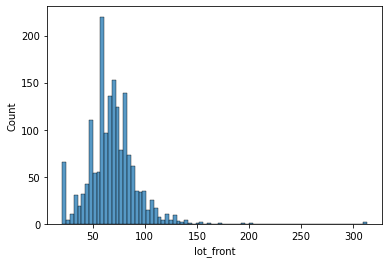

In [10]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())
print(df['lot_front'].median())

In [11]:
# get mean and fill into NA
# why mean -->> because normally distributed centered at mean 69. 
df['lot_front'].fillna(df['lot_front'].mean(),inplace = True)

69.05520046484602


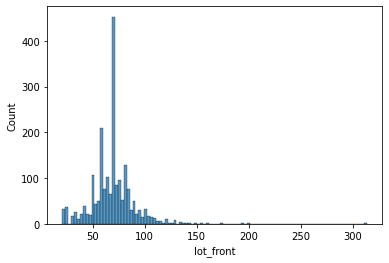

In [12]:
# Lot_font has normal distrubtion centered across mean of 69

sns.histplot(x = 'lot_front', data =df)
print(df['lot_front'].mean())

In [13]:
# change 'nan' to NoAlleyAccess
df['alley'] = df['alley'].map(lambda x: 'NoAlley' if pd.isnull(x) else x)

<AxesSubplot:xlabel='alley', ylabel='sale_price'>

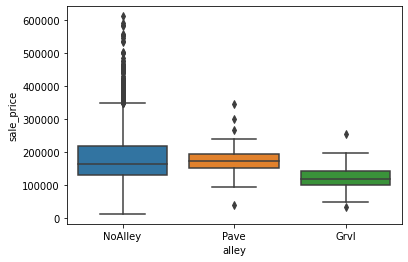

In [14]:
# no meaning to the sales 
# drop alley

sns.boxplot(
    data = df,
    x = 'alley',
    y = 'sale_price'
)

Boxplot shows strong outliers in NoAlley, hence if need to use this data, has to clear outliers first. 

In [15]:
# mas_vnr_type -->> categorical, insert most common type 
df.groupby(by='mas_vnr_type').count()['id']

mas_vnr_type
BrkCmn       13
BrkFace     630
None       1218
Stone       168
Name: id, dtype: int64

mas_vnr_type already has a None column. Will need to classify nan into the mode of the types for minimal impact


In [16]:
# fill missing values with mode of mas_vnr_type
df['mas_vnr_type'].fillna(df['mas_vnr_type'].mode()[0], inplace = True)

(0.0, 600.0)

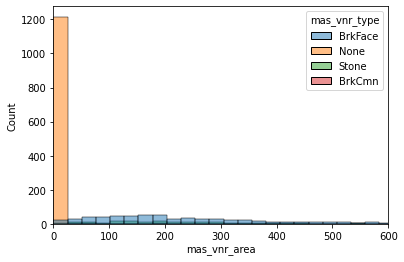

In [17]:
# checked categories for mas_vnr_area
# found if mas vnr area == 0, then belongs to none
sns.histplot(x = 'mas_vnr_area', hue = 'mas_vnr_type', data =df)
plt.xlim(0,600)

<AxesSubplot:xlabel='mas_vnr_type', ylabel='sale_price'>

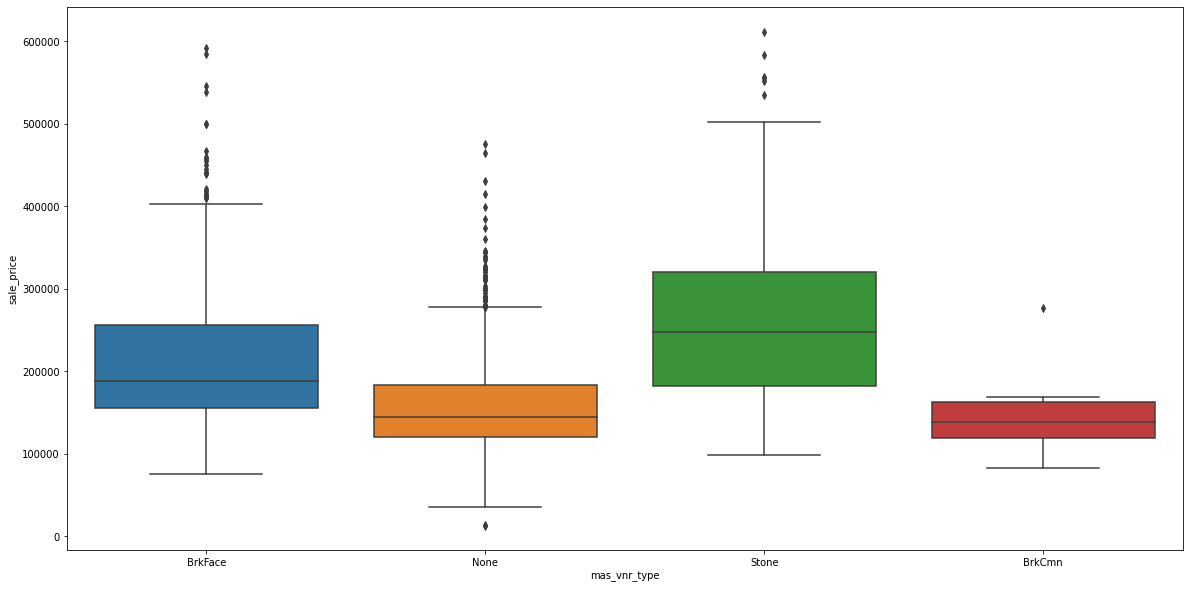

In [18]:
# checking nominal category: mas_vnr_type against sale price

plt.figure(figsize=(20,10))
sns.boxplot(
    x = 'mas_vnr_type',
    y = 'sale_price',
    data = df
)

In [19]:
# create dictionary that stores mean of
mas_dict_mean = {key:val for key, val in df.groupby(['mas_vnr_type'])['mas_vnr_area'].mean().iteritems()}

mas_dict_mean

{'BrkCmn': 194.0,
 'BrkFace': 254.63015873015874,
 'None': 0.5213464696223317,
 'Stone': 230.41071428571428}

In [20]:
# create function that returns mean based on mas_dict_mean if column has null values 
def enter_area(col):
    area = col[0]
    mas_type = col[1]
    if pd.isnull(area):
        return mas_dict_mean[mas_type]
    else:
        return area

In [21]:
# fill in null values for -->> mas_vnr_area
df['mas_vnr_area'] = df[['mas_vnr_area', 'mas_vnr_type']].apply(enter_area, axis = 1)

In [22]:
# missing values seems common across about bsmt columns 
df[df['bsmt_exposure'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,land_contour,util,lot_config,land_slope,neighborhood,cond_1,cond_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,ext_1st,ext_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type1,bsmtfin_sf1,bsmt_type2,bsmt_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplace,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garag_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
12,807,906226060,70,RL,120.0000,26400,Pave,NoAlley,Reg,Bnk,AllPub,FR2,Gtl,SawyerW,Feedr,Norm,1Fam,2Story,5,7,1880,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,1288,728,0,2016,0.0,0.0,1,0,4,1,TA,7,Mod,1,TA,Attchd,1900.0,Unf,2.0,576.0,TA,TA,P,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,131000
93,811,906226100,90,RL,64.0000,7018,Pave,NoAlley,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1535,0,0,1535,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1979.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdPrv,NaN,0,6,2009,WD,118858
114,781,905228050,20,RL,69.0552,9000,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,0,100,0,0,0,NaN,NaN,NaN,0,6,2009,WD,63900
146,888,908128060,85,RL,64.0000,7301,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0.0,0.0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2.0,672.0,TA,TA,Y,0,0,177,0,0,0,NaN,NaN,NaN,0,7,2009,ConLD,198500
183,1554,910251050,20,A (agr),80.0000,14584,Pave,NoAlley,Reg,Low,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,None,0.0,Fa,Po,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,Sal,0,NaN,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
240,2740,905451050,20,RL,80.0000,12048,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1952,2002,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,232.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1488,0,0,1488,0.0,0.0,1,0,3,1,TA,7,Typ,1,Ex,Attchd,2002.0,RFn,2.0,569.0,TA,TA,Y,0,189,36,0,348,0,NaN,NaN,NaN,0,4,2006,WD,135000
249,2242,910206010,50,RM,64.0000,11067,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,2,4,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Ex,Y,SBrkr,640,0,205,845,0.0,0.0,1,0,1,1,TA,4,Maj2,0,NaN,Detchd,1950.0,Unf,1.0,256.0,TA,Fa,N,48,0,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,68104
256,2745,905477010,20,RL,77.0000,8335,Pave,NoAlley,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Gd,Y,SBrkr,1124,0,0,1124,0.0,0.0,1,0,3,1,TA,5,Min2,1,Gd,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,0,36,190,0,0,0,NaN,NaN,NaN,0,4,2006,WD,93000
390,84,532351140,90,RM,68.0000,8930,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,6,5,1978,1978,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,TA,Y,SBrkr,1318,584,0,1902,0.0,0.0,2,0,4,2,TA,8,Typ,0,NaN,Attchd,1978.0,Unf,2.0,539.0,TA,TA,Y,0,0,0

<Figure size 1080x1080 with 0 Axes>

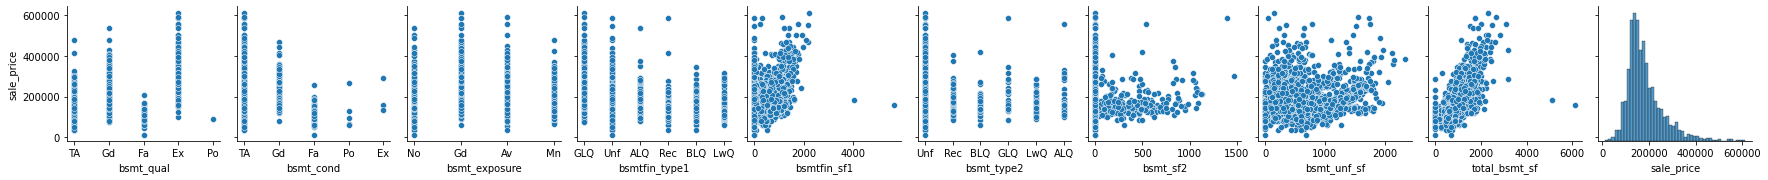

In [23]:
# create pairplot to check relationship between all bsmt parameters against sale_price
# noticed only total_basement_sf area has high correlation with sale_price
# checked only 58 out of 2051 data has NAN -->> meaning no basement 
# will want to change all null to 'NoBsmt'



plt.figure(figsize=(15,15))
sub_bsmt = ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'sale_price']

sns.pairplot(
    df,
    x_vars = sub_bsmt,
    y_vars = ['sale_price'],
    
)

**EDA on basement null values**

bsmt_qual            55 null values

bsmt_cond            55 null values

bsmt_exposure        58 null values

bsmtfin_type1        55 null values

bsmtfin_sf1           1 null values

bsmt_type2           56 null values

In [24]:
# Checked most of the categories have null values as there is no basement. 

df.loc[df['bsmt_exposure'].isnull(), ['bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf']]

,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type1,bsmtfin_sf1,bsmt_type2,bsmt_sf2,bsmt_unf_sf,total_bsmt_sf
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
93,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
114,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
146,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
240,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
249,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
256,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
390,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0
437,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0


In [25]:
# Create none category for those without basement
df['bsmt_cond'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_cond', ylabel='sale_price'>

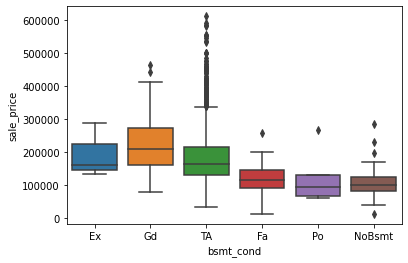

In [26]:
# cross check category, makes sense that those without basement will have lowest mean sale price 
sns.boxplot(
    x = 'bsmt_cond',
    y = 'sale_price',
    data = df,
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
)

In [27]:
# Create none category for those without basement
df['bsmt_type2'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_type2', ylabel='sale_price'>

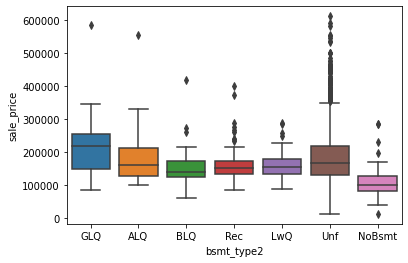

In [28]:
# notice higher prices are under unfinised. 
# no basement is the lowest mean score, which fits the ordinal flow. 

sns.boxplot(
    x = 'bsmt_type2',
    y = 'sale_price',
    data = df,
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
)

In [29]:
# since it is numerical cat, need to take a look at mean. 
# found those with null, average sale price is lower than all the other cats 
# hence safe to create another cat for None. 

bsmt_mean_null = df.loc[df['bsmt_exposure'].isnull(), 'sale_price'].mean()
bsmt_mean = df.groupby('bsmt_exposure').mean()['sale_price']
print(f'mean of null values: {bsmt_mean_null}')
print('\n')
print(f'Mean values of basement exposure: {bsmt_mean}')
df['bsmt_exposure'].value_counts()

mean of null values: 111635.91379310345


Mean values of basement exposure: bsmt_exposure
Av    206262.451389
Gd    271610.566502
Mn    189377.570552
No    164533.532487
Name: sale_price, dtype: float64


No    1339
Av     288
Gd     203
Mn     163
Name: bsmt_exposure, dtype: int64

In [30]:
# Create none category for those without basement
df['bsmt_exposure'].fillna('NoBsmt',inplace = True)

<AxesSubplot:xlabel='bsmt_exposure', ylabel='sale_price'>

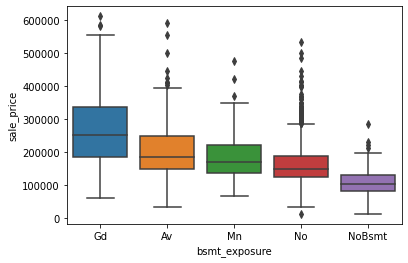

In [31]:
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_exposure',
    y = 'sale_price',
    data = df,
    order = ['Gd','Av','Mn','No','NoBsmt']
)

In [32]:
# fill up null values with NoBsmt
df['bsmt_qual'].fillna('NoBsmt', inplace = True)

<AxesSubplot:xlabel='bsmt_qual', ylabel='sale_price'>

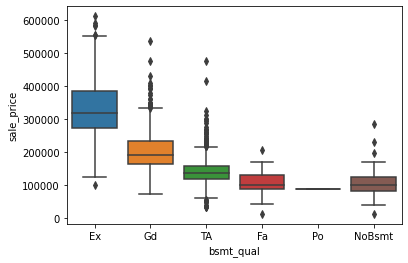

In [33]:
# cross checked ordinally correct for No basement cat
sns.boxplot(
    x = 'bsmt_qual',
    y = 'sale_price',
    data = df,
    order = ['Ex','Gd', 'TA', 'Fa', 'Po', 'NoBsmt']
)

**Seeing small points for Po** 
- might need to remove it if want to use this variable as it might skew predicted data inaccurately. 


In [34]:
# fill up null values with NoBsmt
df['bsmtfin_type1'].fillna('NoBsmt', inplace = True) 

<AxesSubplot:xlabel='bsmtfin_type1', ylabel='sale_price'>

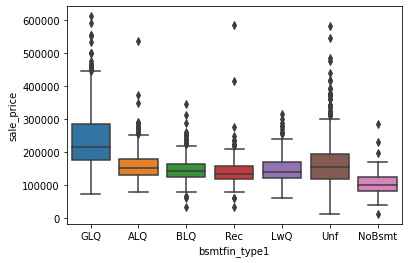

In [35]:
# cross checked ordinally correct for No basement cat

sns.boxplot(
    x = 'bsmtfin_type1',
    y = 'sale_price',
    data = df,
    order = ['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf','NoBsmt']
)

In [36]:
# checked row has no basement
df[df['total_bsmt_sf'].isnull()]

,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,land_contour,util,lot_config,land_slope,neighborhood,cond_1,cond_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,ext_1st,ext_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type1,bsmtfin_sf1,bsmt_type2,bsmt_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplace,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garag_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
1327,1342,903230120,20,RM,99.0,5940,Pave,NoAlley,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NoBsmt,NoBsmt,NoBsmt,NoBsmt,NaN,NoBsmt,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,79000


In [37]:
# replace na with 0 feet square

df['bsmtfin_sf1'].fillna(0, inplace = True) 
df['bsmt_sf2'].fillna(0, inplace = True) 
df['total_bsmt_sf'].fillna(0, inplace = True) 
df['bsmt_unf_sf'].fillna(0, inplace = True) 

<AxesSubplot:xlabel='fireplace_qu', ylabel='sale_price'>

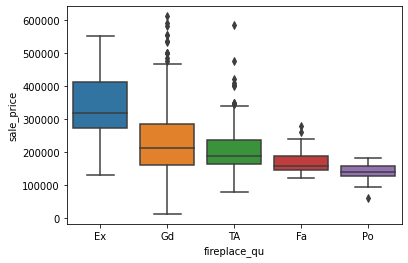

In [38]:
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
)

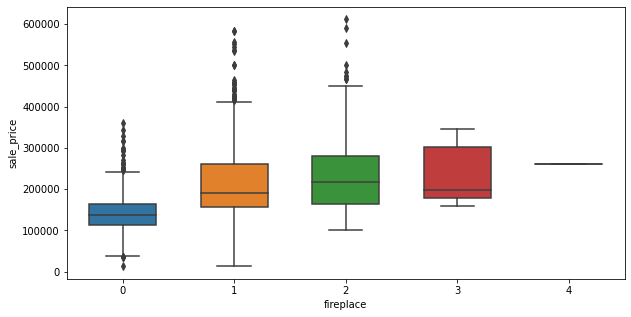

In [39]:
# Establish size of figure.
plt.figure(figsize = (10,5))


sns.boxplot(
    x = 'fireplace',
    y = 'sale_price',
    data = df,
#     hue = 'fireplace_qu',
#     hue_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    width = 0.6
);


In [40]:
df.groupby('fireplace')['fireplace'].count()

fireplace
0    1000
1     898
2     146
3       6
4       1
Name: fireplace, dtype: int64

**Observed rating 4 having only one point, might need to remove this variable if need to use as results might be skewed**

In [41]:
# null values contain sale price mean close to 144000
df[df['fireplace_qu'].isnull()].agg(['mean', 'median'])['sale_price']

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


mean      142001.103
median    136500.000
Name: sale_price, dtype: float64

In [42]:
# found that cat Po suites best for null values to be included without affecting much mean 
df.groupby(['fireplace_qu']).agg(['mean', 'median', 'count'])['sale_price']

,mean,median,count
fireplace_qu,,,
Ex,331481.483871,320000.0,31
Fa,170287.203390,159500.0,59
Gd,233578.388145,213490.0,523
Po,139263.967742,139000.0,31
TA,204893.621622,188500.0,407


In [43]:
# fill na with NoFireplace
df['fireplace_qu'] = df['fireplace_qu'].fillna('NoFireplace')

<AxesSubplot:xlabel='fireplace_qu', ylabel='sale_price'>

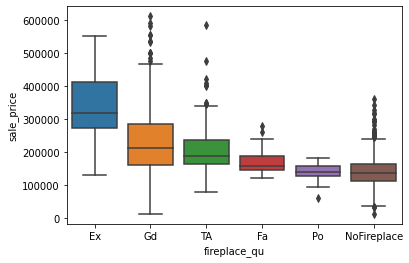

In [44]:
# cross checked ordinally correct for nofireplace
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po','NoFireplace'],
)

**Can see alot of outliers in Gd, TA, and Po (after adding NAN) inside. Hence, this might not be good to insert into our model**

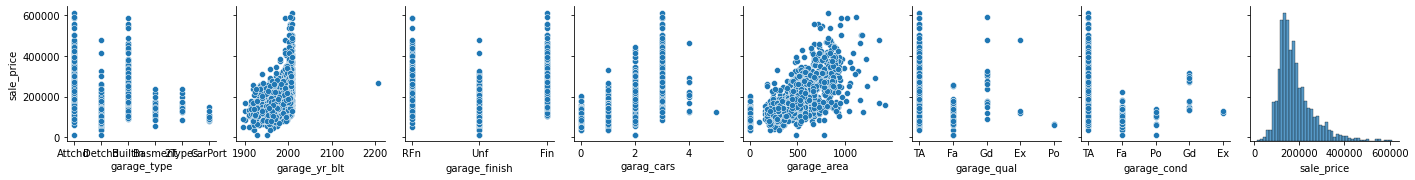

In [45]:
sns.pairplot(
    y_vars = 'sale_price',
    x_vars = ['garage_type',
    'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
    'garage_qual', 'garage_cond','sale_price'],
    data = df
)

In [46]:
# fill in None for now, might drop categorical columns if need to refine model

df['garage_type'] = df['garage_type'].fillna('NoGarage')
df['garage_finish'] = df['garage_finish'].fillna('NoGarage')
df['garage_qual'] = df['garage_qual'].fillna('NoGarage')
df['garage_cond'] = df['garage_cond'].fillna('NoGarage')

df['garage_area'].fillna(df['garage_area'].mean(),inplace = True)
df['garag_cars'].fillna(df['garag_cars'].mode()[0],inplace = True)
# drop garage year built as null values cannot be replaced, it cannot be replaced by any random values or mean too. 

df.drop(columns = ['garage_yr_blt'], inplace = True)

In [47]:
# noticed when pool area ==0, other categories also null 

df[df['pool_area'] == 0]

,id,pid,ms_subclass,ms_zoning,lot_front,lot_area,street,alley,lot_shape,land_contour,util,lot_config,land_slope,neighborhood,cond_1,cond_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod_add,roof_style,roof_matl,ext_1st,ext_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type1,bsmtfin_sf1,bsmt_type2,bsmt_sf2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abv_gr,kitchen_abv_gr,kitchen_qual,tot_rms_abv_grd,functional,fireplace,fireplace_qu,garage_type,garage_finish,garag_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_price
0,109,533352170,60,RL,69.0552,13517,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NoFireplace,Attchd,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0000,11492,Pave,NoAlley,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0000,7922,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NoFireplace,Detchd,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0000,9802,Pave,NoAlley,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NoFireplace,BuiltIn,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0000,14235,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NoFireplace,Detchd,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,20,RL,79.0000,11449,Pave,NoAlley,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,1011.0,Unf,0.0,873.0,1884.0,GasA,Ex,Y,SBrkr,1728,0,0,1728,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,Fin,2.0,520.0,TA,TA,Y,0,276,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,69.0552,12342,Pave,NoAlley,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,5,1940,1950,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,262.0,Unf,0.0,599.0,861.0,GasA,Ex,Y,SBrkr,861,0,0,861,0.0,0.0,1,0,1,1,TA,4,Typ,0,NoFireplace,Detchd,Unf,2.0,539.0,TA,TA,Y,158,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,WD,82500
2048,916,909253010,50,RL,57.0000,7558,Pave,NoAlley,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1.5Fin,6,6,1928,1950,Gable,CompShg,BrkFace,Stone,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,896.0,896.0,GasA,Gd,Y,SBrkr,1172,741,0,1913,0.0,0.0,1,1,3,1,TA,9,Typ,1,TA,Detchd,Unf,2.0,342.0,Fa,Fa,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,3,2009,W

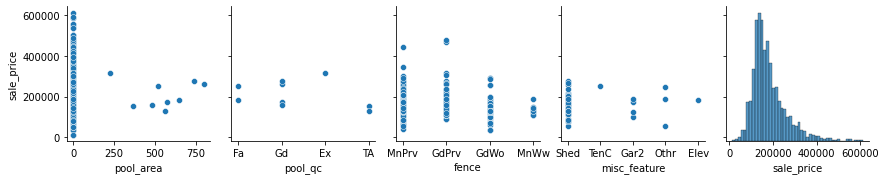

In [48]:
# too little points to do correlation for pool area 

sns.pairplot(
    x_vars = ['pool_area', 'pool_qc', 'fence', 'misc_feature', 'sale_price'],
    y_vars = 'sale_price',
    data = df
)

In [49]:
# drop all pool columns 

drop_pool_list = ['pool_qc', 'fence', 'misc_feature']

df = df.drop(columns = drop_pool_list, axis = 1)

<AxesSubplot:xlabel='year_built', ylabel='sale_price'>

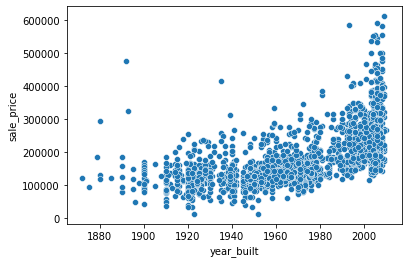

In [50]:
# seeing decreasing trend, and exceptionally high cost built recently 
sns.scatterplot(
    x = 'year_built',
    y = 'sale_price',
    data = df
)

In [51]:
# noticed more than 30K having larger variance for predicted models vs price 
# create separate column to EDA and hue against sale price 

df['above300K'] = df['sale_price'].apply(lambda x: 1 if x > 300000 else 0)

In [52]:
df['above300K'].value_counts()

0    1887
1     164
Name: above300K, dtype: int64

In [53]:
df['sale_price'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: sale_price, dtype: float64

<AxesSubplot:xlabel='sale_price', ylabel='Count'>

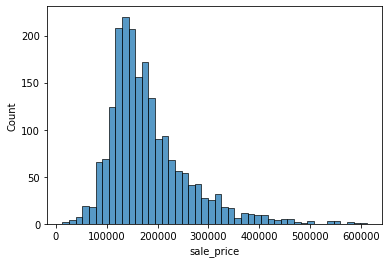

In [54]:
sns.histplot(x = 'sale_price', data = df)

In [55]:
df['sale_price_classified'] = df['sale_price'].apply(lambda x: 2 if x > 450000 else 1 if ((x < 450000) & (x > 300000)) else 0)

In [56]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_front', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'util', 'lot_config',
       'land_slope', 'neighborhood', 'cond_1', 'cond_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'roof_style', 'roof_matl', 'ext_1st', 'ext_2nd',
       'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abv_gr', 'kitchen_abv_gr', 'kitchen_qual', 'tot_rms_abv_grd',
       'functional', 'fireplace', 'fireplace_qu', 'garage_type',
       'garage_finish', 'garag_cars', 'garage_area', 'garage_qual',


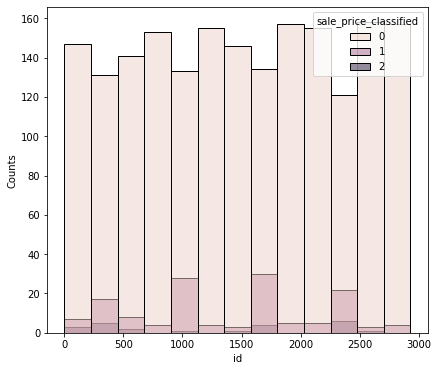

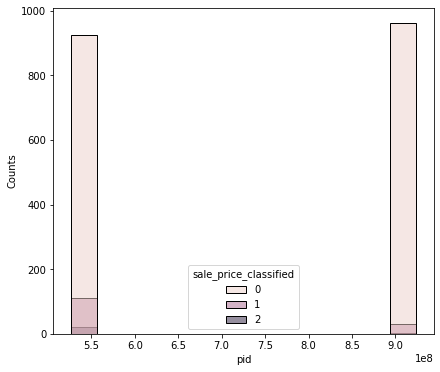

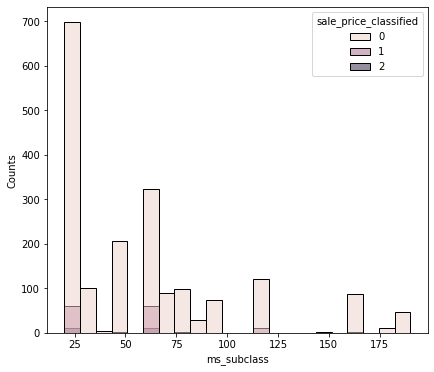

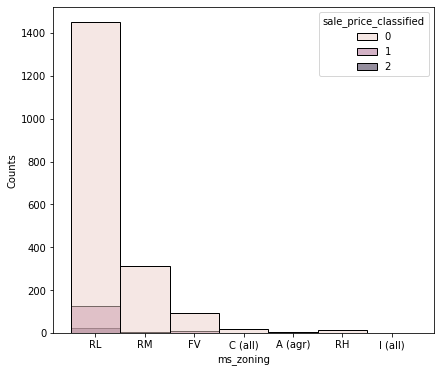

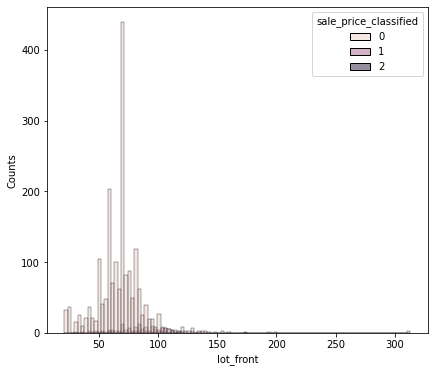

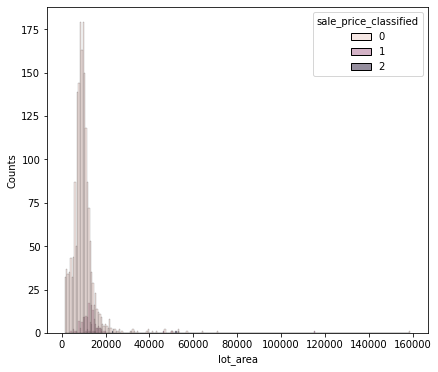

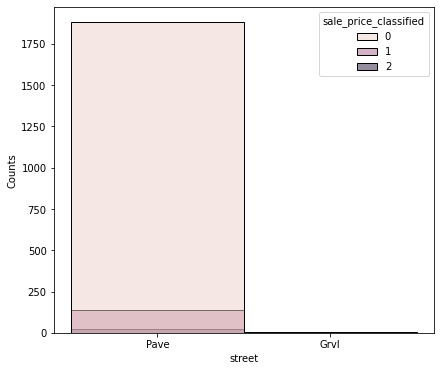

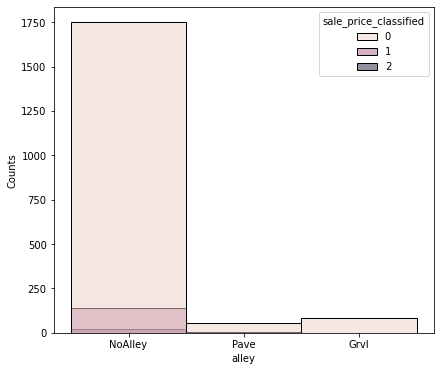

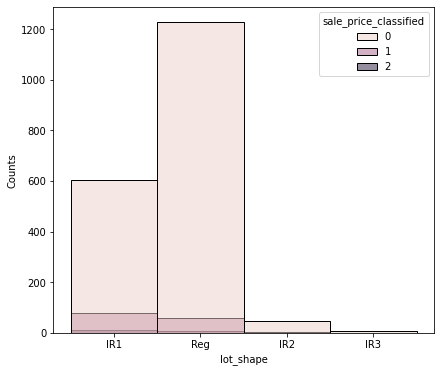

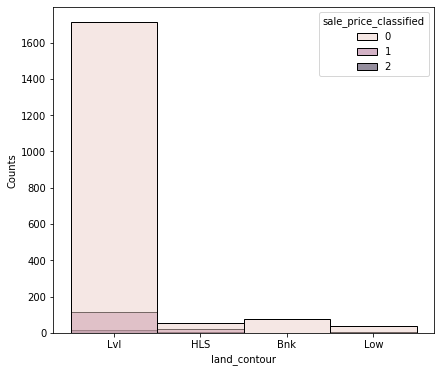

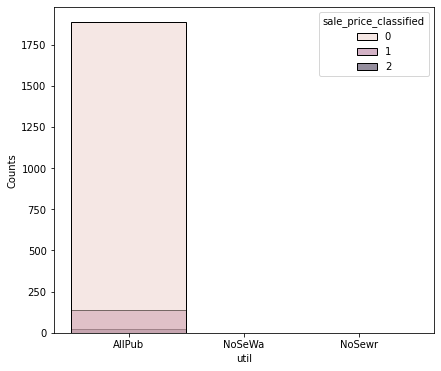

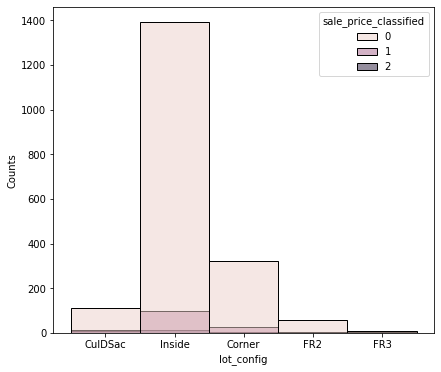

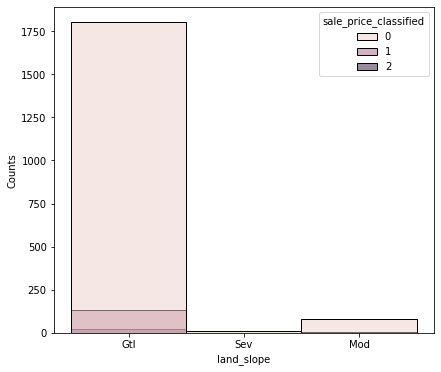

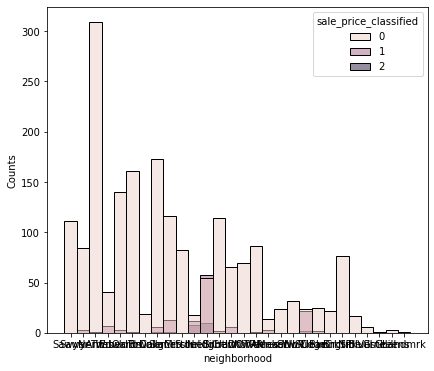

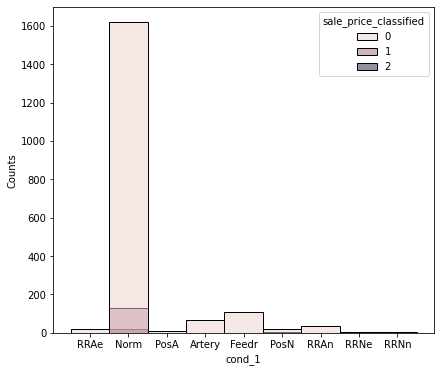

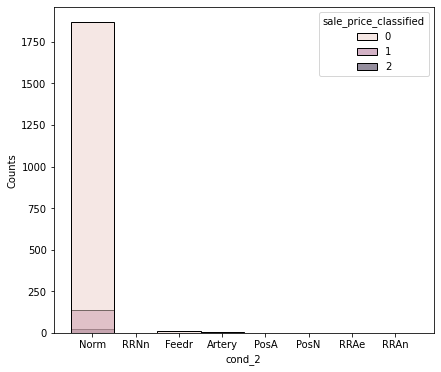

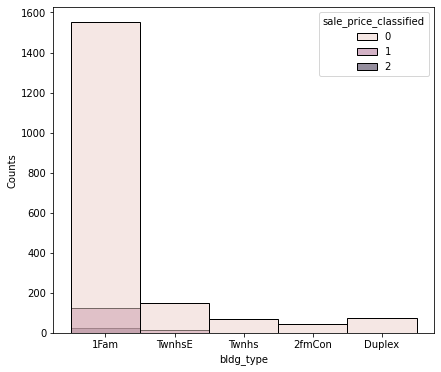

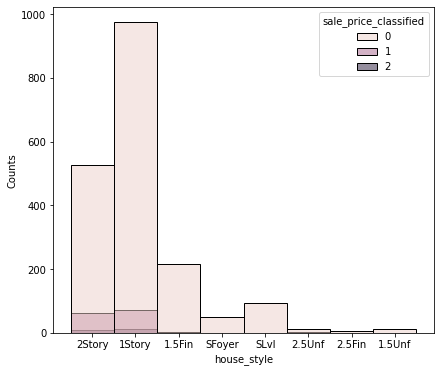

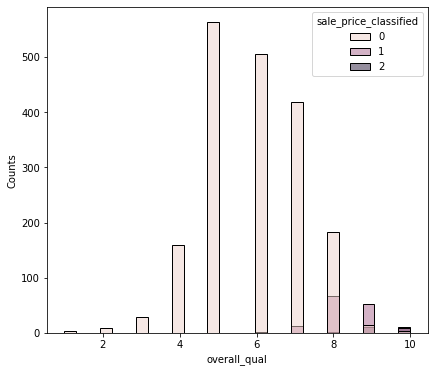

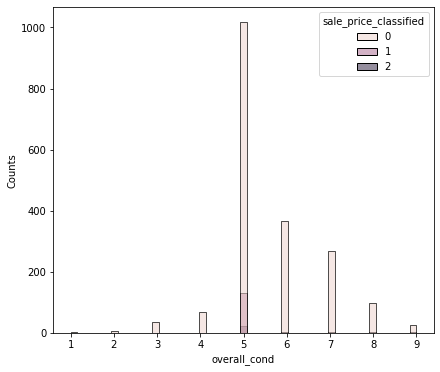

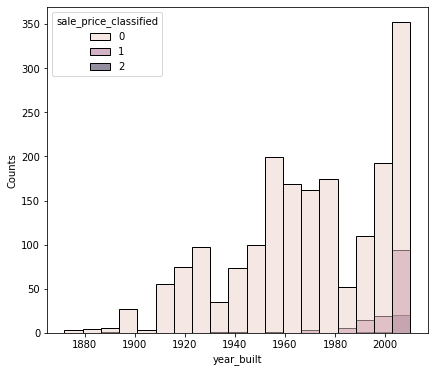

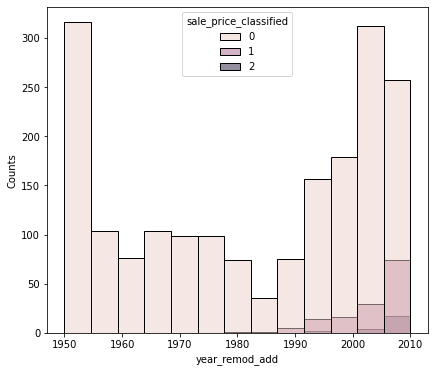

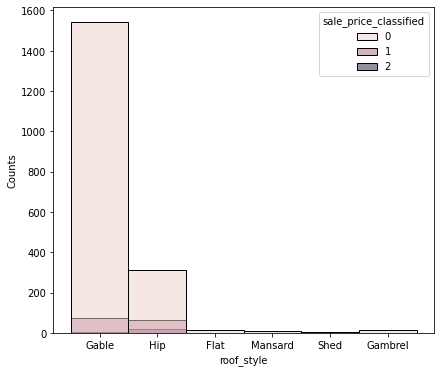

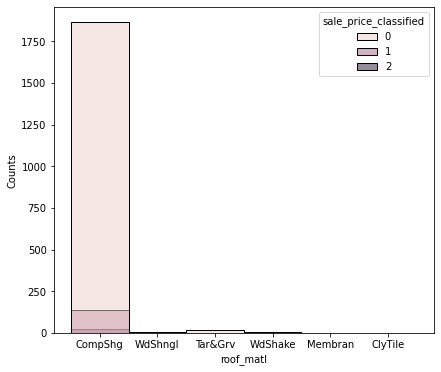

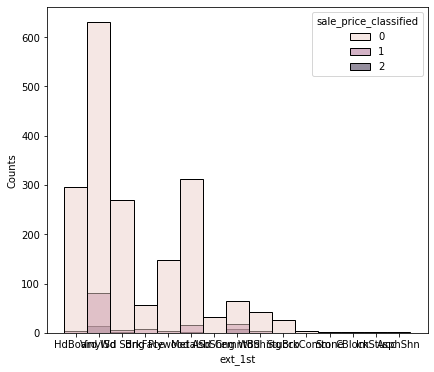

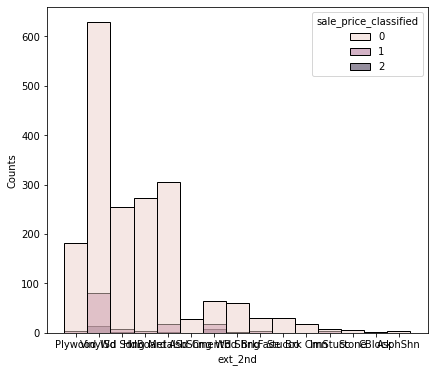

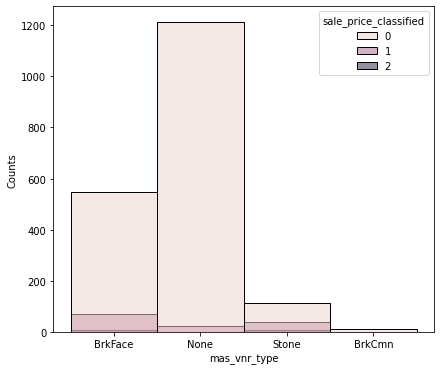

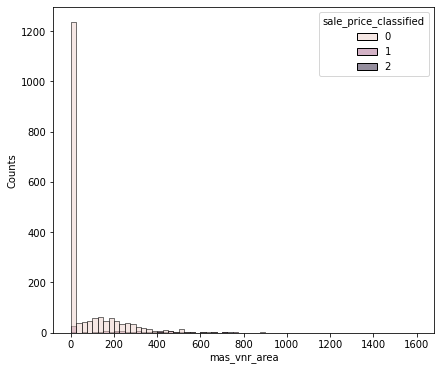

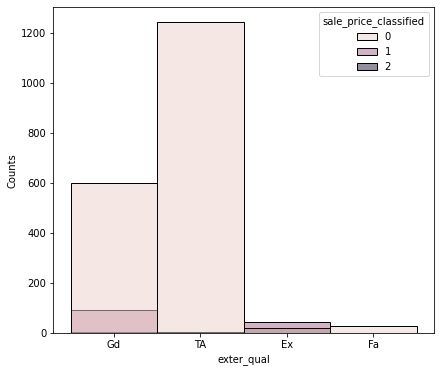

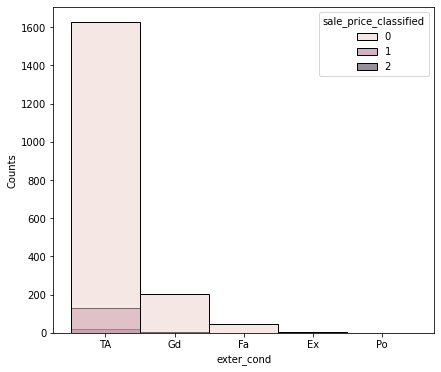

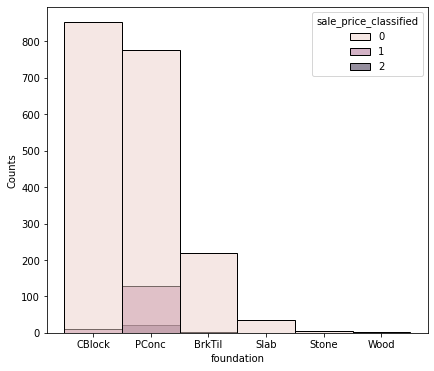

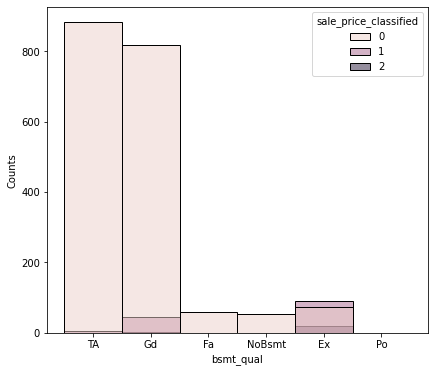

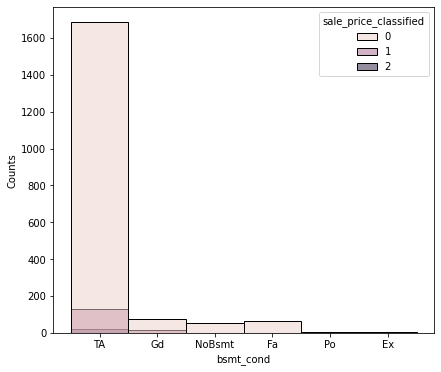

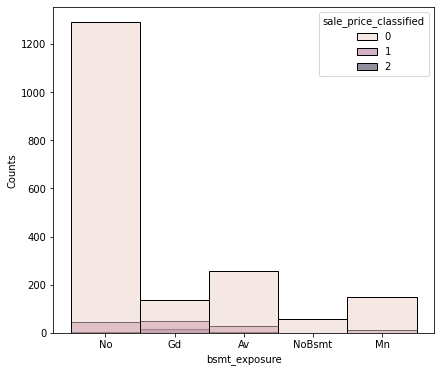

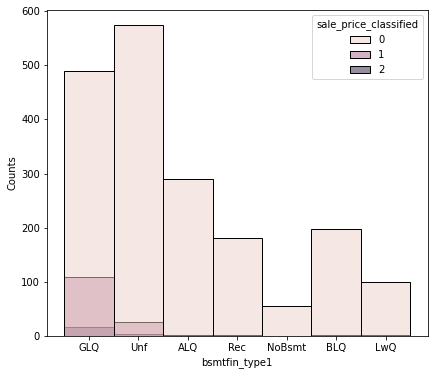

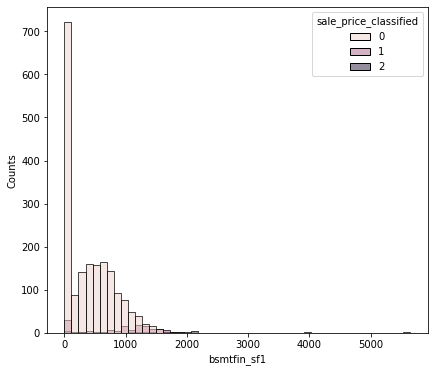

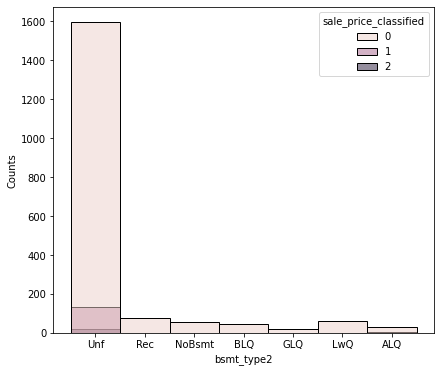

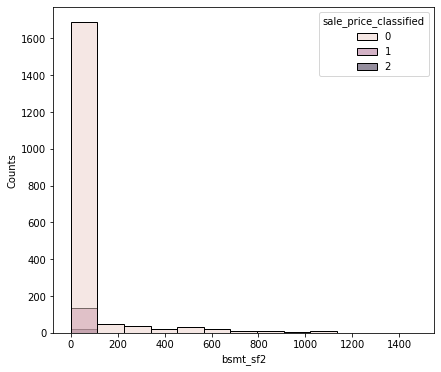

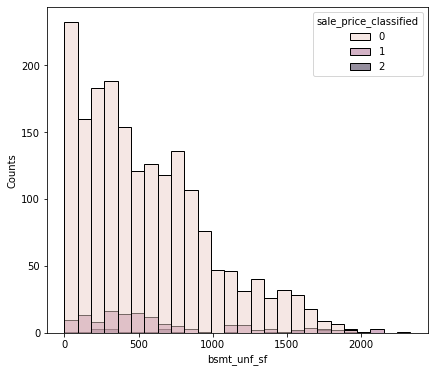

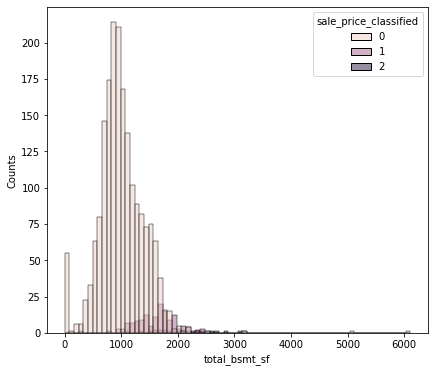

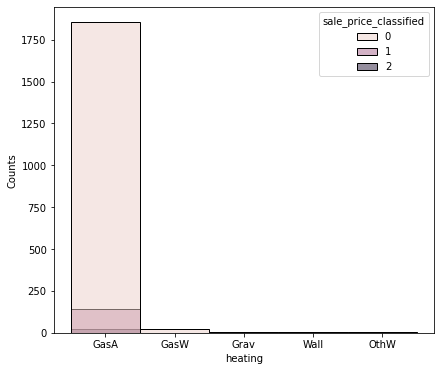

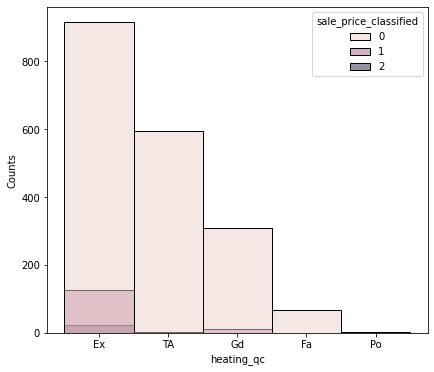

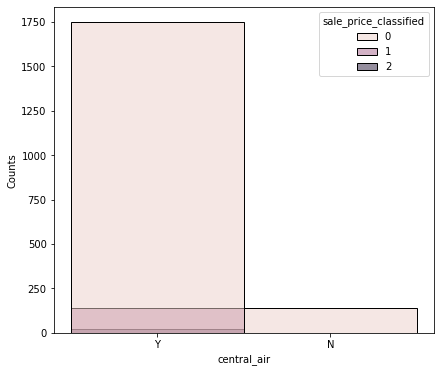

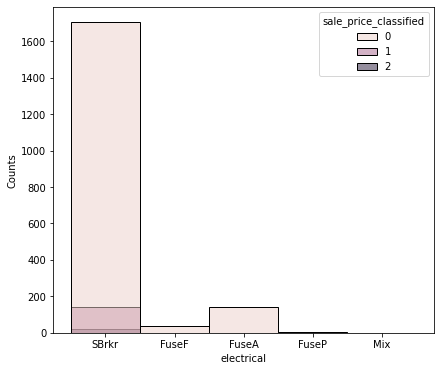

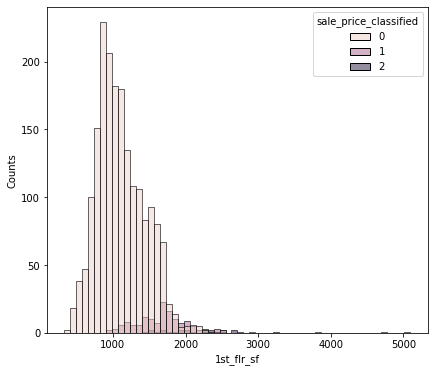

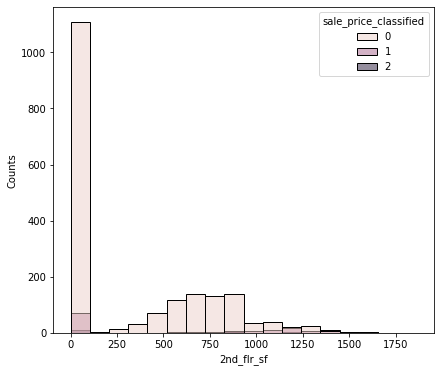

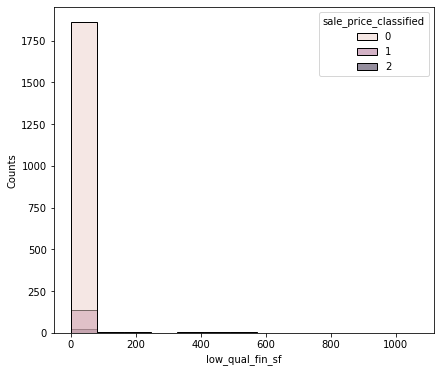

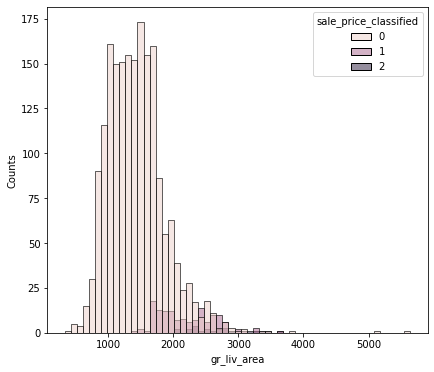

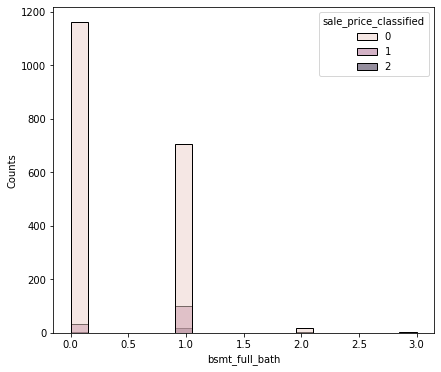

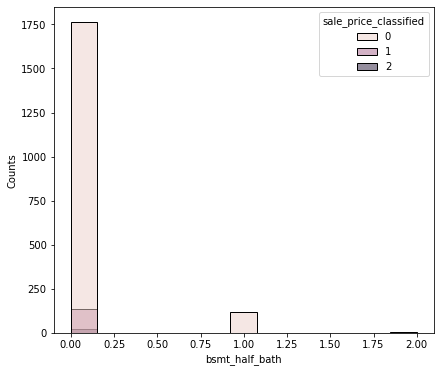

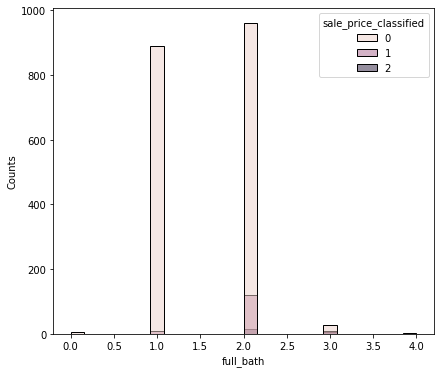

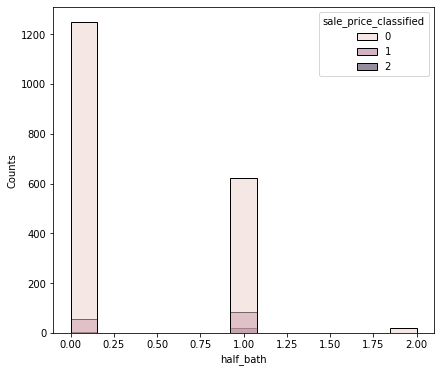

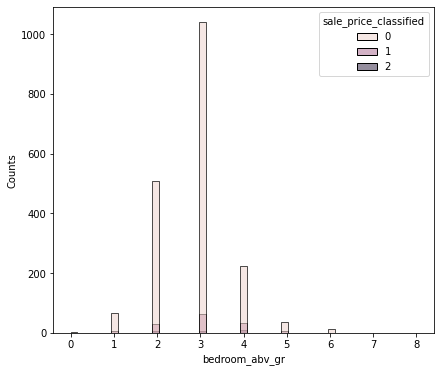

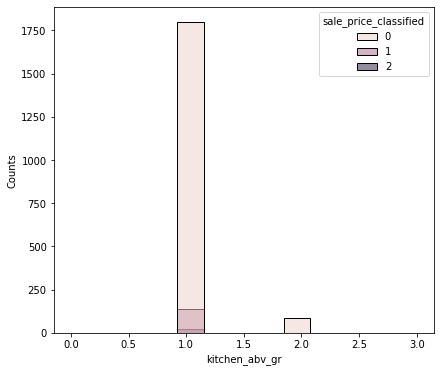

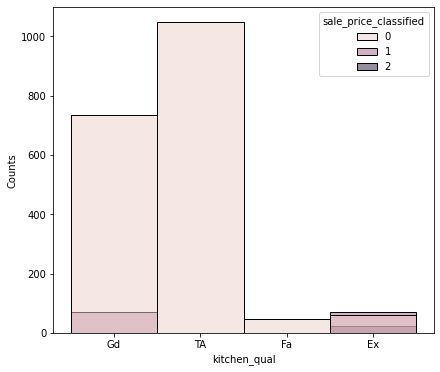

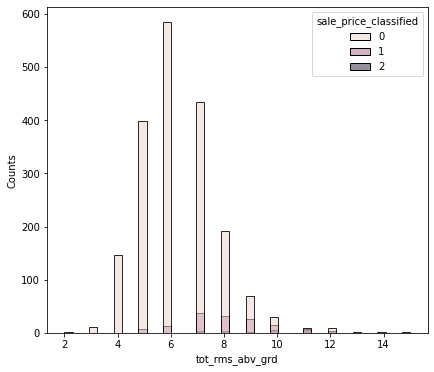

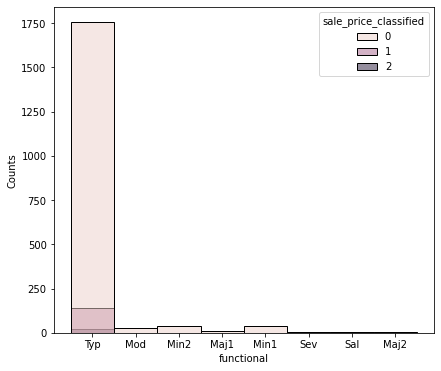

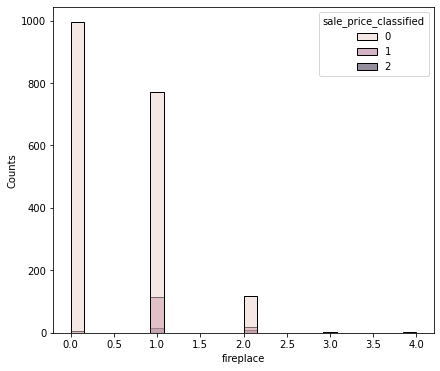

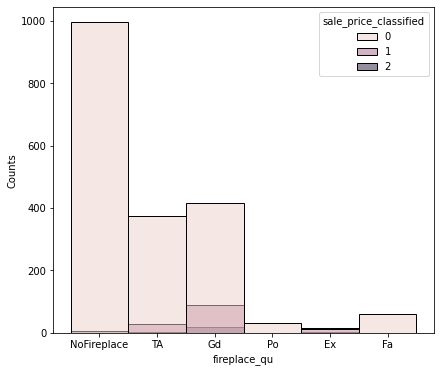

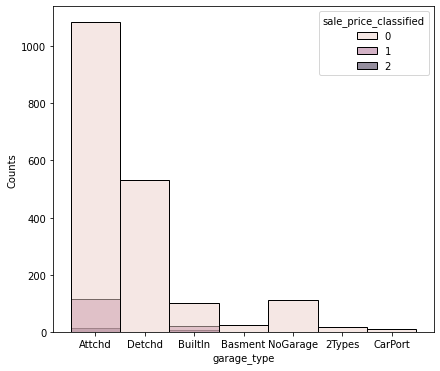

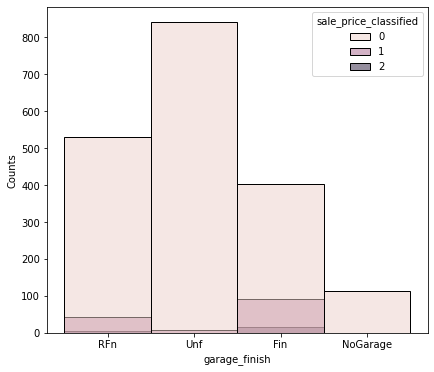

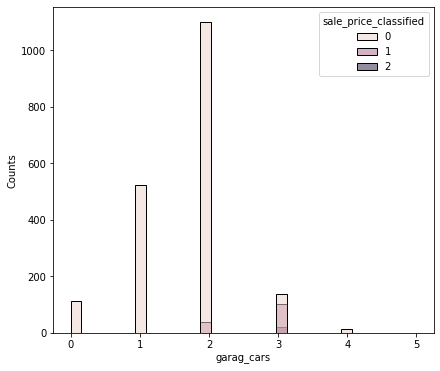

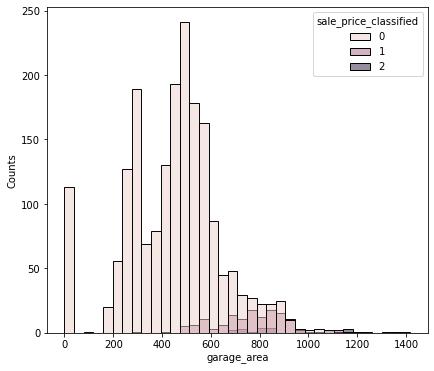

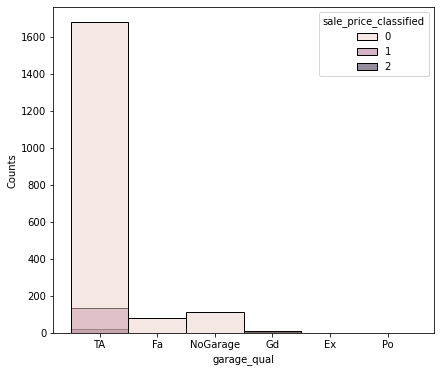

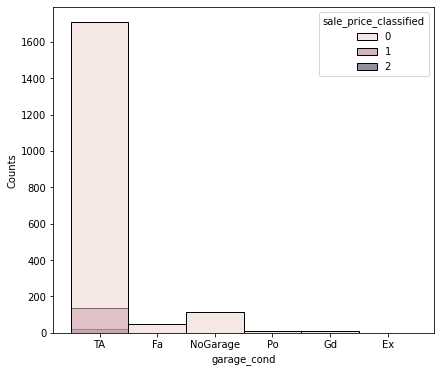

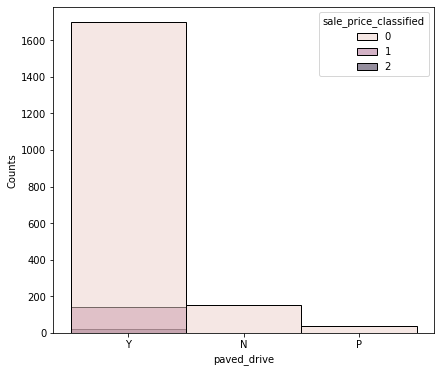

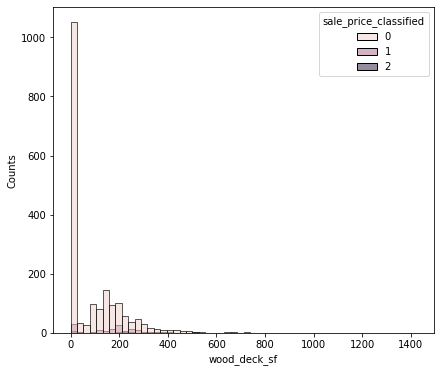

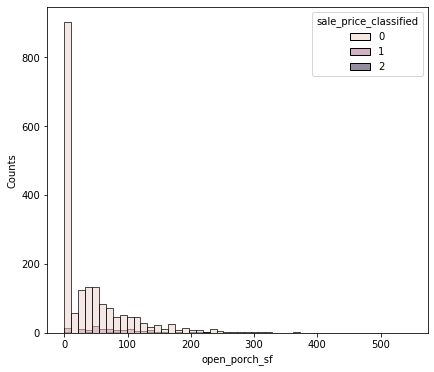

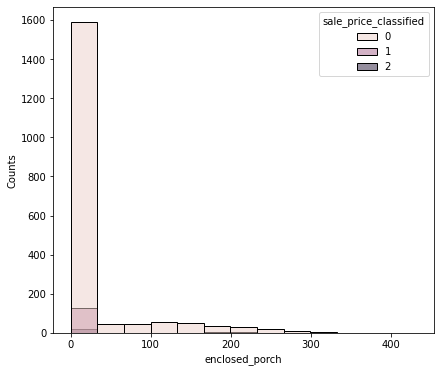

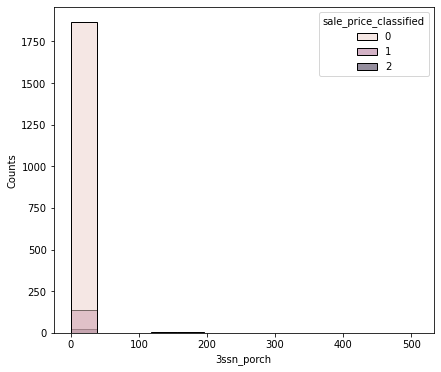

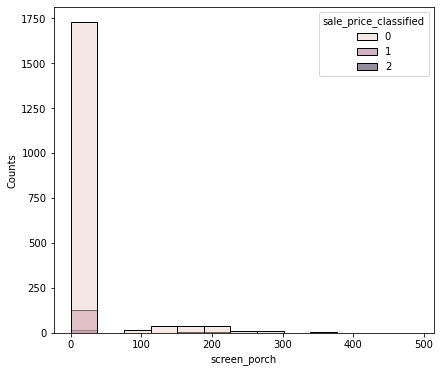

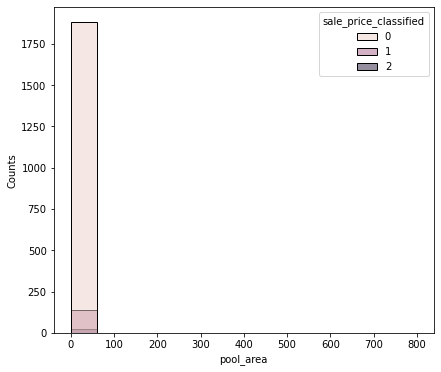

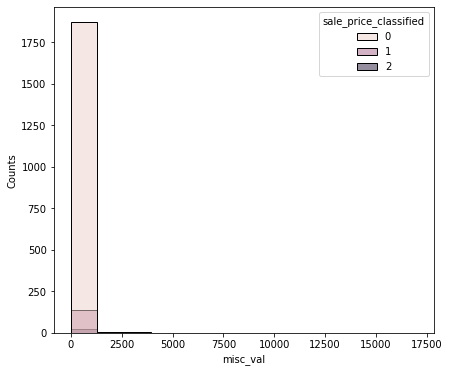

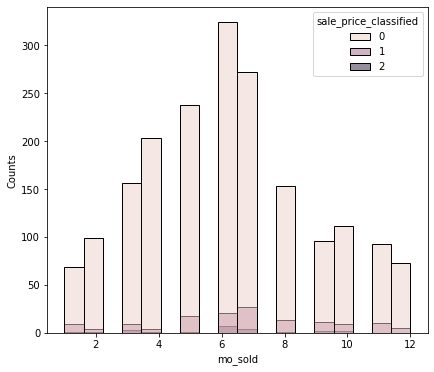

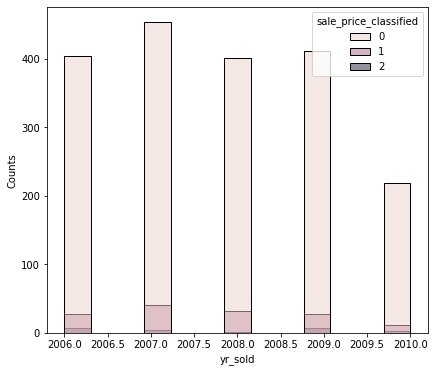

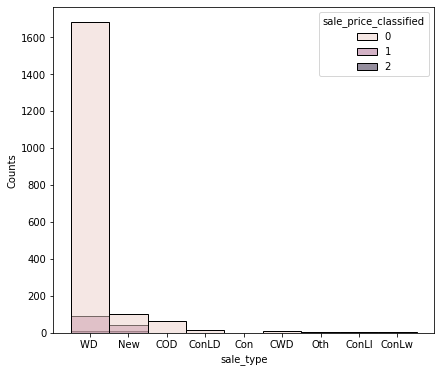

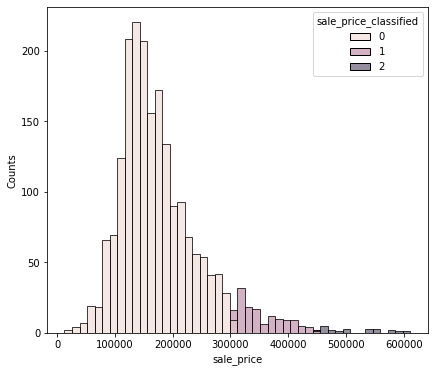

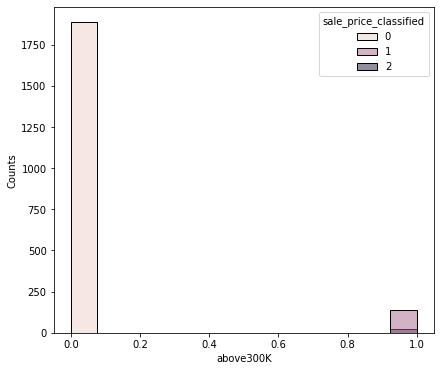

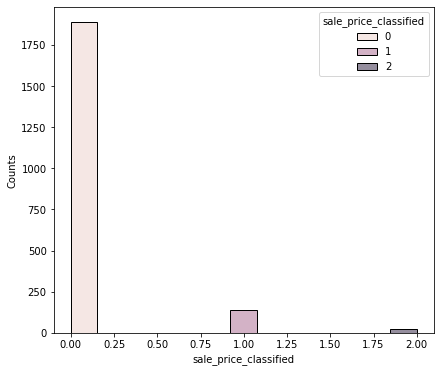

In [57]:
for var in df.columns:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.histplot(x = var, data = df, hue = 'sale_price_classified', color = 'tab10')
    fig.set_title('')
    fig.set_xlabel(var)
    fig.set_ylabel('Counts')

    plt.show()

**Variables not to use/may not use*

id, pid --> no relevance 

ms_subclass, ms_zoning, cond1, cond2, bldg_type,house_style, overall_cond, ext_1st, ext_2nd, mas_vnr_type,mas_vnr_area
bsmt_cond, bsmt_exposure, bsmt_unf_sf
--> overlaps with higher sale price, nt in order, hence not good 

pave, no alley, lot shape, land_cotour,util, lot_config, land_slope,roof_style, roof_matl,exter_cond,foundation, 
bsmtfin_type1, bsmt_type2, bsmt_sf2, heating, central_air, electrical, 
->> majority classified under low sale price, which may skew predicted price lower 

bsmtfin_sf1 --> good distribution against sale price clsuter, but having cluster even at near zero with high sale price



**Variables to use**

1) lot_front -> distribution is clear against sale price
2) lot_area -> distribution is clear against sale price, but need to take care of above 20000
3) Neighbourhood --> can see clusters of higher cost housing in certain areas
4) Overall_qual --> positively correlated to ordinal cat against sale price
5) year_built --> the latest it was built in, the higher the price, need to watch for cluster after year 2000
6) year_removd_add --> the latest it was built in, the higher the price, need to watch for cluster after year 2000
7) exter_qual --> positively correlated to ordinal cat against sale price, cluster in EX
8) bsmt_qual --> positively correlated to ordinal cat against sale price, cluster in EX
9) heating_qc --> most high end sale price are in ex, need watch for cluster at ex with normal sale price. 
              --> can consider interaction terms with other quals to be more accurate for higher selling price
              
10) 

['exter_qual',
 'kitchen_qual',
 'bsmt_qual',
 'garage_finish',
 'fireplace_qu',
 'bsmtfin_type1',
 'heating_qc',
 'bsmt_exposure',
 'overall_cond',
 'lot_shape']

(1000.0, 60000.0)

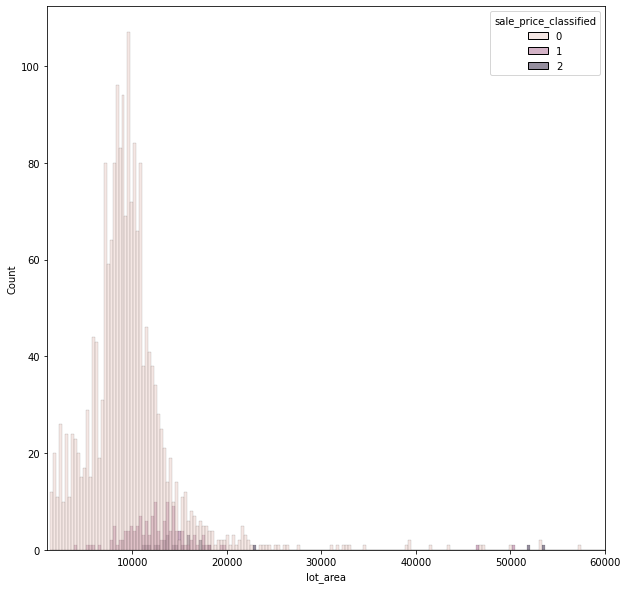

In [58]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'lot_area', data = df, hue = 'sale_price_classified', bins =500)

plt.xlim(1000,60000)

In [59]:
df.groupby('sale_price_classified')['lot_area'].mean()

sale_price_classified
0     9703.356992
1    13602.642857
2    18236.260870
Name: lot_area, dtype: float64

**Will need to do iteraction term with lot area classified into 3 main cat and interact with lot area it self**

(1000.0, 3000.0)

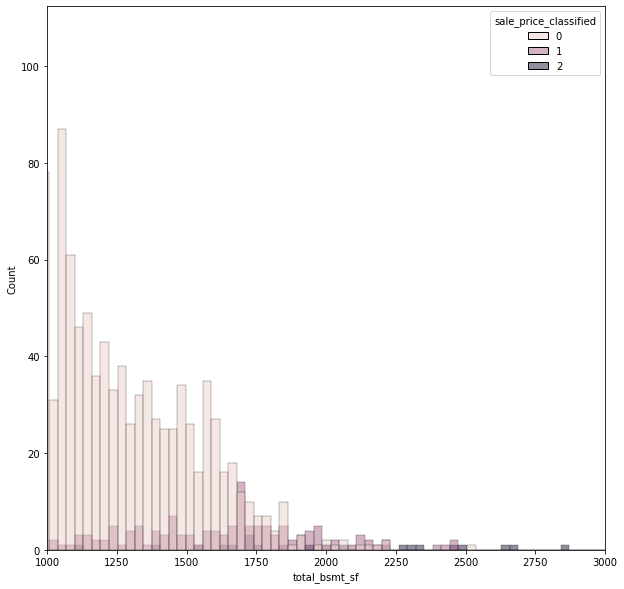

In [60]:
plt.figure(figsize=(10,10))
sns.histplot(x = 'total_bsmt_sf', data = df, hue = 'sale_price_classified', bins =200)

plt.xlim(1000,3000)

In [61]:
df.groupby('sale_price_classified')['total_bsmt_sf'].count()

sale_price_classified
0    1888
1     140
2      23
Name: total_bsmt_sf, dtype: int64

<AxesSubplot:xlabel='neighborhood', ylabel='Count'>

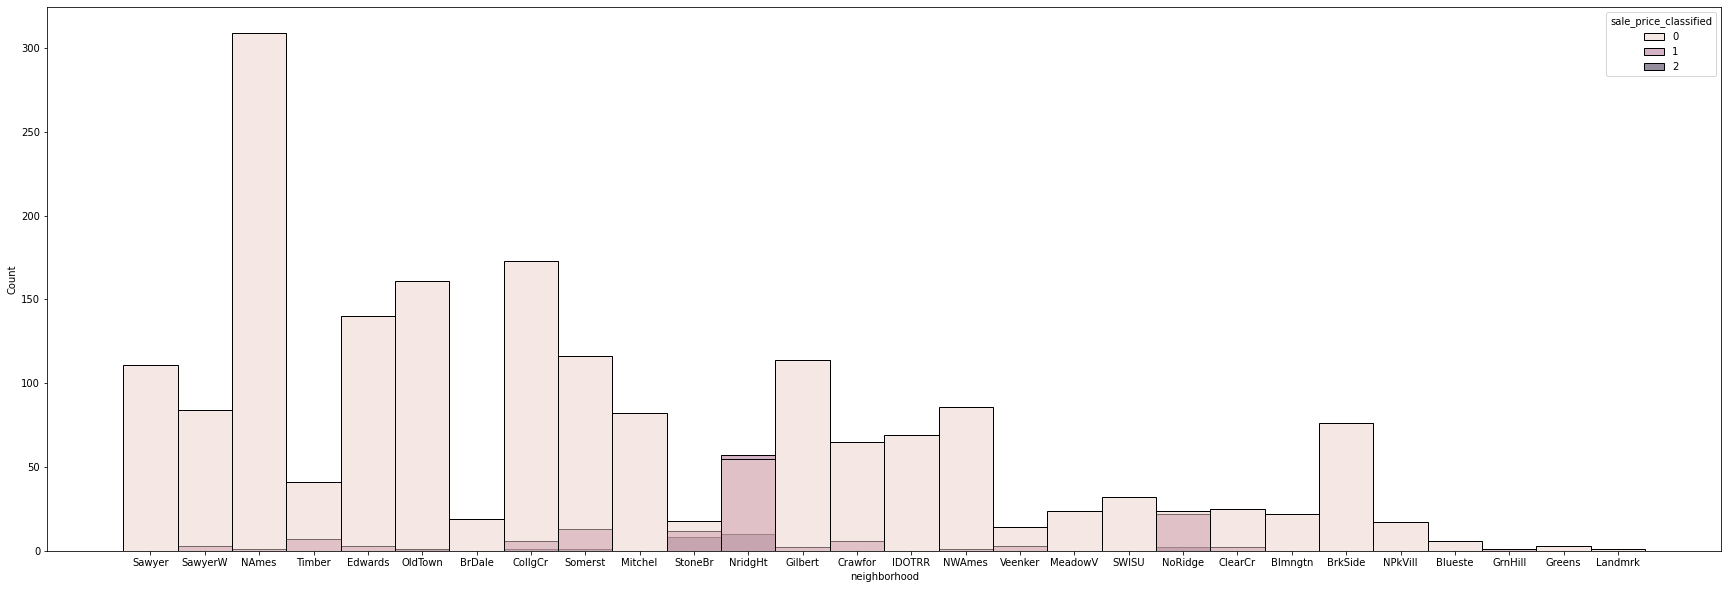

In [62]:
plt.figure(figsize=(30,10))
sns.histplot(x = 'neighborhood', data = df, hue = 'sale_price_classified')

# plt.xlim(1000,3000)

**comments**
1) Northridge Heights, Stone Brook and Northridge has majority high sale price housing


### Filter out numerical, and categorical (Ordinal) features 

In [63]:
categorical_features = [col for col in df.columns if df[col].dtype == 'O']

In [64]:
numerical_features = [col for col in df.columns if df[col].dtype != 'O']

In [65]:
ordinal_cat = ['lot_shape','util','land_slope','exter_qual','exter_cond','bsmt_qual','bsmt_cond','bsmt_exposure',
               'bsmtfin_type1','bsmt_type2','electrical','kitchen_qual','functional','fireplace_qu','garage_finish',
               'garage_qual','garage_cond','paved_drive','overall_cond','heating_qc'
]

## Pre - processing

**Converting categorical variables**

In [66]:
alist = []
ordinal_score_list = []
for col in ordinal_cat:
    # instantiate 
    alist = []
    # append column 
    alist.append(col)
    # applying OneHotCode
    df_to_OHE = df[[col]]
    # define one hot encoding
    encoder = OneHotEncoder(sparse=False)
    # transform data
    feature_arr = encoder.fit_transform(df_to_OHE)
    
    feature_labels = encoder.categories_
    feature_labels = np.array(feature_labels).ravel()
    
    feature_encoded = pd.DataFrame(feature_arr, columns = feature_labels )

    # assign X and y

    X = feature_encoded
    y = df['sale_price']

    # Create train/test splits.
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=0.2,
        random_state = 123
    )

    # Scale our data.
    # Relabeling scaled data as "Z" is common.
    sc = StandardScaler()
    # Z_train = sc.fit_transform(X_train)
    sc.fit(X_train) # fit should only see train data, 
                    #else if put in test, will have leak from the train data 
    X_train = sc.transform(X_train)
    X_test = sc.transform(X_test)

    lr = LinearRegression()

    # cross val mse
    cross_score = - cross_val_score(
        lr,
        X_train,
        y_train,
        cv = 3,
        scoring = 'neg_mean_squared_error'
    ).mean()
    # append cross score
    alist.append(cross_score)
    
    ordinal_score_list.append(alist)


ordinal_score_list = pd.DataFrame(ordinal_score_list)                   
ordinal_score_list = ordinal_score_list.rename(columns = {0: 'Column', 1: 'Score'})
ordinal_score_list = ordinal_score_list.sort_values(by = 'Score', ascending = True)     

In [67]:
# picking top 5 ordinal categorical columns for model fitting

ordinal_score_list.head(10)

,Column,Score
3,exter_qual,2.973001e+09
11,kitchen_qual,3.208542e+09
5,bsmt_qual,3.261672e+09
14,garage_finish,4.532264e+09
13,fireplace_qu,4.558849e+09
8,bsmtfin_type1,5.113823e+09
19,heating_qc,5.128473e+09
7,bsmt_exposure,5.208321e+09
18,overall_cond,5.492752e+09
0,lot_shape,6.017464e+09


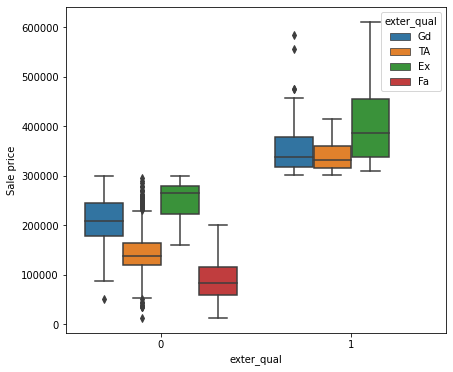

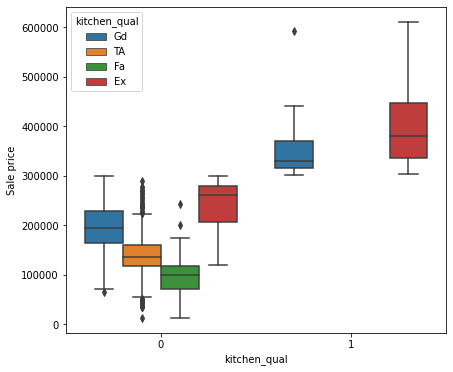

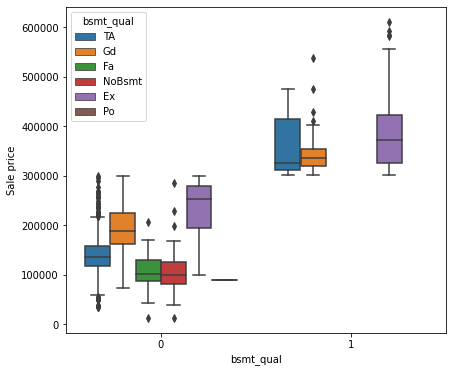

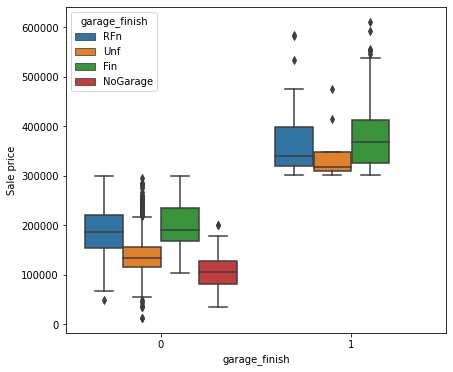

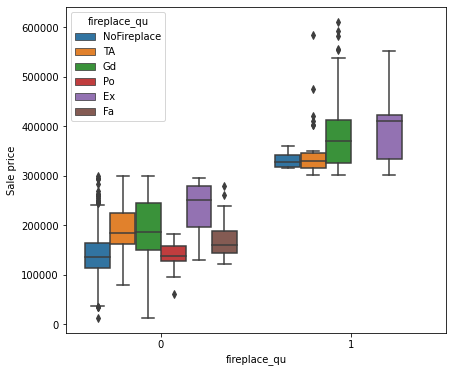

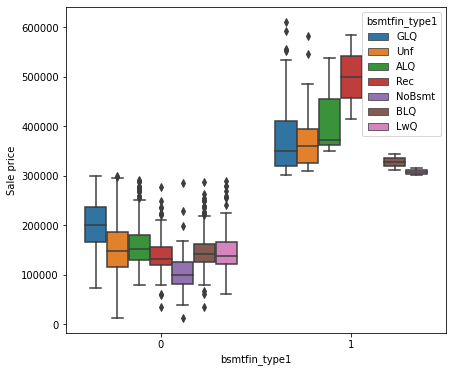

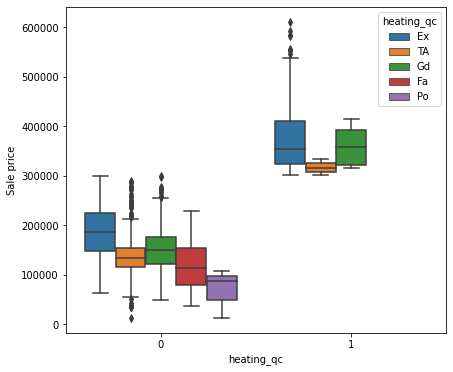

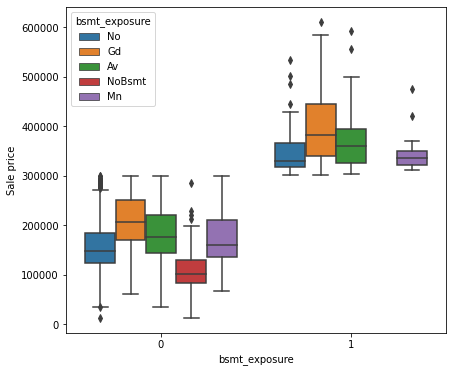

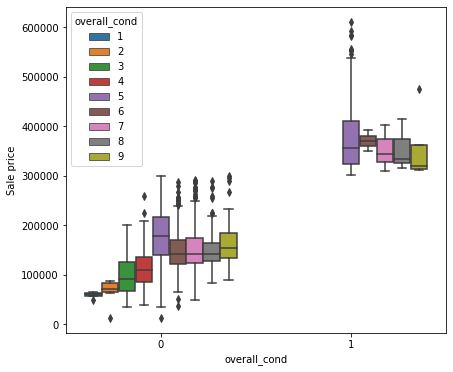

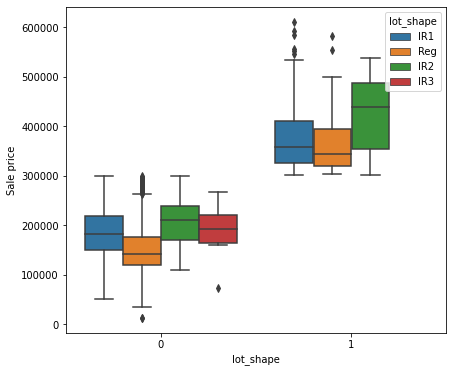

In [68]:
# checking boxplots for abnormal values of sale price in ordinal cat

for var in ordinal_score_list.head(10)['Column'].values:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(x = 'above300K', y= 'sale_price', data = df, hue = var)
    fig.set_title('')
    fig.set_xlabel(var)
    fig.set_ylabel('Sale price')

    plt.show()

In [69]:
df['bsmt_full_bath'].unique()

array([ 0.,  1.,  2., nan,  3.])

In [70]:
# assign 0 to bsmt_full_bath since no basement 
df.loc[df['bsmt_full_bath'].isnull(), 'bsmt_full_bath'] = 0

In [71]:
# assign 0 to bsmt_full_bath since no basement 
df.loc[df['bsmt_half_bath'].isnull(), 'bsmt_half_bath'] = 0

In [72]:
# make copy of main df as Backup

main_df = df.copy()

**numerical feature selection**

In [73]:
variables = ['overall_qual', 'gr_liv_area', 'garage_area',
       'garag_cars', '1st_flr_sf', 'total_bsmt_sf', 'year_built', 'full_bath',
       'year_remod_add', 'tot_rms_abv_grd', 'mas_vnr_area', 'fireplace',
       'bsmtfin_sf1', 'lot_front', 'open_porch_sf', 'wood_deck_sf', 'lot_area']

variables_1 = ['overall_qual', 'gr_liv_area', 'garage_area',
       'garag_cars', '1st_flr_sf', 'total_bsmt_sf', 'year_built', 'full_bath',
       'year_remod_add', 'tot_rms_abv_grd', 'mas_vnr_area', 'fireplace',
       'bsmtfin_sf1', 'lot_front', 'open_porch_sf', 'wood_deck_sf', 'lot_area',
       'half_bath', 'bsmt_full_bath', '2nd_flr_sf', 'bsmt_unf_sf',
       'screen_porch', 'bedroom_abv_gr', '3ssn_porch', 'mo_sold', 'pool_area',
       'bsmt_sf2', 'misc_val', 'yr_sold', 'low_qual_fin_sf','bsmt_half_bath', 'ms_subclass', 'kitchen_abv_gr', 'overall_cond',
       'enclosed_porch']

variables_2 = ['overall_qual','gr_liv_area', 'garage_area',
       'garag_cars', '1st_flr_sf', 'total_bsmt_sf', 'full_bath',
        'tot_rms_abv_grd', 'mas_vnr_area', 'fireplace',
       'bsmtfin_sf1','year_remod_add','year_built', 'lot_front']

variables_3 = ['overall_qual', 'gr_liv_area', 'garage_area',]

In [74]:
num_cat = df[variables]

**Ordinal Feature Selection**

In [75]:
# choose categorical columns 

columns = list(ordinal_score_list.head(10)['Column'].values)
columns

['exter_qual',
 'kitchen_qual',
 'bsmt_qual',
 'garage_finish',
 'fireplace_qu',
 'bsmtfin_type1',
 'heating_qc',
 'bsmt_exposure',
 'overall_cond',
 'lot_shape']

In [76]:
columns.append('above300K')

In [77]:
ord_cat = 0
#increment by one for every field, used to differentiate between first iteration vs the rest
i = 0

for field in columns:
    # assign df1 as temp df -->> and dummify it, drop first column too 
 
    df1 = pd.get_dummies(data = df[field], drop_first = True, columns = field, prefix = field)
    
    # if first iter, assign df final to copied of df1
    if i == 0:
        ord_cat = df1.copy()
    # not first iter, concat with df_final to stack with dummified df1
    else:
         ord_cat = pd.concat([ord_cat, df1], axis = 1) 
            
    i += 1

ord_cat

,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_NoBsmt,bsmt_qual_Po,bsmt_qual_TA,garage_finish_NoGarage,garage_finish_RFn,garage_finish_Unf,fireplace_qu_Fa,fireplace_qu_Gd,fireplace_qu_NoFireplace,fireplace_qu_Po,fireplace_qu_TA,bsmtfin_type1_BLQ,bsmtfin_type1_GLQ,bsmtfin_type1_LwQ,bsmtfin_type1_NoBsmt,bsmtfin_type1_Rec,bsmtfin_type1_Unf,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_exposure_NoBsmt,overall_cond_2,overall_cond_3,overall_cond_4,overall_cond_5,overall_cond_6,overall_cond_7,overall_cond_8,overall_cond_9,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,above300K_1
0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2047,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2048,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2049,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [78]:
# concat for model variables 

model_feat = pd.concat([num_cat,ord_cat], axis =1 )
model_feat

,overall_qual,gr_liv_area,garage_area,garag_cars,1st_flr_sf,total_bsmt_sf,year_built,full_bath,year_remod_add,tot_rms_abv_grd,mas_vnr_area,fireplace,bsmtfin_sf1,lot_front,open_porch_sf,wood_deck_sf,lot_area,exter_qual_Fa,exter_qual_Gd,exter_qual_TA,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_NoBsmt,bsmt_qual_Po,bsmt_qual_TA,garage_finish_NoGarage,garage_finish_RFn,garage_finish_Unf,fireplace_qu_Fa,fireplace_qu_Gd,fireplace_qu_NoFireplace,fireplace_qu_Po,fireplace_qu_TA,bsmtfin_type1_BLQ,bsmtfin_type1_GLQ,bsmtfin_type1_LwQ,bsmtfin_type1_NoBsmt,bsmtfin_type1_Rec,bsmtfin_type1_Unf,heating_qc_Fa,heating_qc_Gd,heating_qc_Po,heating_qc_TA,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmt_exposure_NoBsmt,overall_cond_2,overall_cond_3,overall_cond_4,overall_cond_5,overall_cond_6,overall_cond_7,overall_cond_8,overall_cond_9,lot_shape_IR2,lot_shape_IR3,lot_shape_Reg,above300K_1
0,6,1479,475.0,2.0,725,725.0,1976,2,2005,6,289.0,0,533.0,69.0552,44,0,13517,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,7,2122,559.0,2.0,913,913.0,1996,2,1997,8,132.0,1,637.0,43.0000,74,0,11492,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2,5,1057,246.0,1.0,1057,1057.0,1953,1,2007,5,0.0,0,731.0,68.0000,52,0,7922,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,5,1444,400.0,2.0,744,384.0,2006,2,2007,7,0.0,0,0.0,73.0000,0,100,9802,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
4,6,1445,484.0,2.0,831,676.0,1900,2,1993,6,0.0,0,0.0,82.0000,59,0,14235,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,8,1728,520.0,2.0,1728,1884.0,2007,2,2007,7,0.0,1,1011.0,79.0000,276,0,11449,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2047,4,861,539.0,2.0,861,861.0,1940,1,1950,4,0.0,0,262.0,69.0552,0,158,12342,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
2048,6,1913,342.0,2.0,1172,896.0,1928,1,1950,9,0.0,1,0.0,57.0000,0,0,7558,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2049,4,1200,294.0,1.0,1200,1200.0,1956,1,1956,6,0.0,2,155.0,80.0000,189,0,10400,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [79]:
model_feat = pd.concat([model_feat,df['sale_price']], axis = 1)

### Polynomial features

In [80]:
poly_feat = ['overall_qual','gr_liv_area', 'garage_area',
       'garag_cars', '1st_flr_sf', 'total_bsmt_sf', 'full_bath',
        'tot_rms_abv_grd', 'mas_vnr_area', 'fireplace',
       'bsmtfin_sf1','year_remod_add','year_built', 'lot_front']

In [81]:
model_feat.columns

Index(['overall_qual', 'gr_liv_area', 'garage_area', 'garag_cars',
       '1st_flr_sf', 'total_bsmt_sf', 'year_built', 'full_bath',
       'year_remod_add', 'tot_rms_abv_grd', 'mas_vnr_area', 'fireplace',
       'bsmtfin_sf1', 'lot_front', 'open_porch_sf', 'wood_deck_sf', 'lot_area',
       'exter_qual_Fa', 'exter_qual_Gd', 'exter_qual_TA', 'kitchen_qual_Fa',
       'kitchen_qual_Gd', 'kitchen_qual_TA', 'bsmt_qual_Fa', 'bsmt_qual_Gd',
       'bsmt_qual_NoBsmt', 'bsmt_qual_Po', 'bsmt_qual_TA',
       'garage_finish_NoGarage', 'garage_finish_RFn', 'garage_finish_Unf',
       'fireplace_qu_Fa', 'fireplace_qu_Gd', 'fireplace_qu_NoFireplace',
       'fireplace_qu_Po', 'fireplace_qu_TA', 'bsmtfin_type1_BLQ',
       'bsmtfin_type1_GLQ', 'bsmtfin_type1_LwQ', 'bsmtfin_type1_NoBsmt',
       'bsmtfin_type1_Rec', 'bsmtfin_type1_Unf', 'heating_qc_Fa',
       'heating_qc_Gd', 'heating_qc_Po', 'heating_qc_TA', 'bsmt_exposure_Gd',
       'bsmt_exposure_Mn', 'bsmt_exposure_No', 'bsmt_exposure_NoBsmt',


In [82]:
empty_list = []
df_combi_mse = []
for val in list(combinations(model_feat.columns.drop(['sale_price','above300K_1']), 3)):
    # instantiate empty list 
    empty_list = []

    # append in combination
    empty_list.append(list(val))

    X = model_feat[list(val)]
    y = model_feat['sale_price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= np.random.seed(123))

    # instantiate lr
    lr = LinearRegression()

    #append in cross score
    empty_list.append(-cross_val_score(lr, X_train, y_train, cv=3, scoring ='neg_mean_squared_error').mean())   


    df_combi_mse.append(empty_list)
        
df_combi_mse = pd.DataFrame(df_combi_mse)
df_combi_mse = df_combi_mse.rename(columns = {0: 'Combinations', 1: 'Score'})
df_combi_mse = df_combi_mse.sort_values(by = 'Score', ascending = True)
df_combi_mse

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp/ipykernel_9708/2776195118.py", line 18, in <module>
    empty_list.append(-cross_val_score(lr, X_train, y_train, cv=3, scoring ='neg_mean_squared_error').mean())
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 509, in cross_val_score
    cv_results = cross_validate(
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 267, in cross_validate
    results = parallel(
  File "C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Admin\AppData\Local\Programs\Python\Pytho

TypeError: object of type 'NoneType' has no len()

In [ ]:
filter_best_combi = list(df_combi_mse['Combinations'].head(5))

In [ ]:
filter_best_combi = [' '.join(level) for level in filter_best_combi] 
filter_best_combi

In [ ]:
X = df[poly_feat]
poly = PolynomialFeatures(include_bias=False, degree = 2)


In [ ]:
poly.fit(X)

In [ ]:
X_poly = poly.fit_transform(X)

In [ ]:
X_poly

In [ ]:
poly_concat = pd.DataFrame(X_poly, columns=poly.get_feature_names(poly_feat))[filter_best_combi]

In [ ]:
poly_concat

In [ ]:
model_feat = pd.concat([model_feat,poly_concat], axis = 1)

In [ ]:
model_feat

**Log value**

In [ ]:
sns.pairplot(
    x_vars = variables,
    y_vars = 'sale_price',
    data = df

)

In [ ]:
log_variables = ['year_built', 'year_remod_add', 'gr_liv_area', 'garage_area']

In [ ]:
for feat in log_variables:
    data = model_feat.copy()
    if 0 in data[feat].unique():
        pass
    else:
        plt.figure(figsize=(15,6))
        plt.subplot(1, 2, 1)
        data[feat] = np.log(data[feat])
        data['sale_price'] = np.log(data['sale_price'])
        fig = sns.regplot(x = feat, y = 'sale_price', data = data)
        fig.set_xlabel(feat)
        fig.set_ylabel('Sale price')

In [ ]:
sns.histplot(
     x = 'sale_price',
    data = data

)

**Apply Standard Scaler**

In [83]:
# assign X and y

X = df[variables_1]
y = df['sale_price']


# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Modelling

**Linear Regression - First pass**

In [84]:
lr = LinearRegression()

lr.fit(X_train,y_train)

# cross val mse
cross_score = - cross_val_score(
    lr,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lr.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 1146512907.7539704
MSE for test: 1883922219.704088
Overfitted by: -737409311.9501176
RMSE: 43404.17283745985


Text(27.125, 0.5, 'Actual Sale Price')

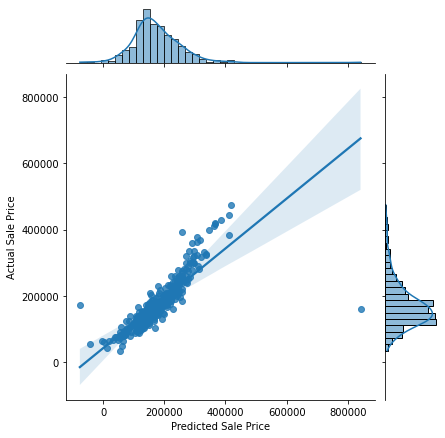

In [85]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lr.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

**Lasso Regression**

In [86]:
# initiate 
lasso = LassoCV(
    cv=5,
    max_iter=50000,
    n_alphas=200,
)

# Fit model using best ridge alpha!
lasso.fit(X_train, y_train);


lasso.alpha_

65.12807938280194

In [87]:
lasso_best = Lasso(alpha = lasso.alpha_)

In [88]:
# fit lasso best 

lasso_best.fit(X_train,y_train)

Lasso(alpha=65.12807938280194)

In [89]:
# cross val mse
cross_score = - cross_val_score(
    lasso_best,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 1146651683.8648374
MSE for test: 1861867028.954835
Overfitted by: -715215345.0899975
RMSE: 43149.35722528013


In [90]:
# MSE for test: 1498556570.0823781
# MSE for test: 1292841509.1969898
# Underfited by: 205715060.88538837
# RMSE: 14342.770335098738

Text(27.125, 0.5, 'Actual Sale Price')

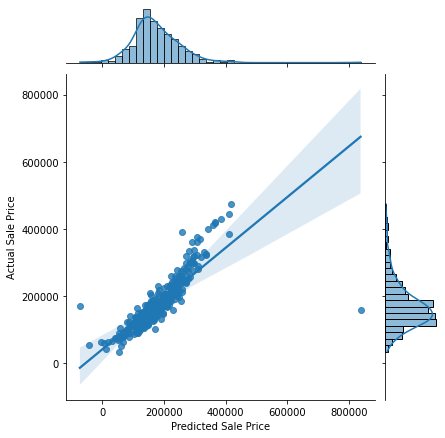

In [91]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax = sns.jointplot(
    x = lasso_best.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax.ax_joint.set_xlabel('Predicted Sale Price')
ax.ax_joint.set_ylabel('Actual Sale Price')

In [92]:
lasso_best.predict(X_test).max()

837779.0226582927

In [93]:
# find out index 339 having anomaly 
anomaly = {num: val for num,val in enumerate (lasso_best.predict(X_test)>638000) if val == True}
anomaly

{339: True}

In [94]:
y_test.values[339]

160000

In [95]:
# find out other similar prices with 160000
{num: val for num,val in enumerate (y_test == y_test.values[339]) if val == True}

{31: True, 286: True, 339: True}

In [96]:
Ab_val= pd.DataFrame(X_test[339])
val1= pd.DataFrame(X_test[31])
val2= pd.DataFrame(X_test[286])

In [97]:
Ab_val.shape

(35, 1)

In [98]:
val1.shape

(35, 1)

In [99]:
val2.shape

(35, 1)

In [100]:
sample = pd.concat([Ab_val,val1,val2], axis = 1)
sample.columns = ['Ab', 'norm1', 'norm2']

In [101]:
# True outlier compared to two other rows with similar coefficients against sale price

sample.sort_values(by = 'Ab', ascending = False)

,Ab,norm1,norm2
13,12.195833,0.149751,0.749556
25,11.772362,-0.066745,-0.066745
12,11.572265,0.698594,0.449494
5,11.486996,-0.151616,0.059995
4,8.965186,-0.404825,0.396575
1,8.251718,-0.991720,-0.363254
16,7.595056,-0.065447,-0.215639
2,4.365638,0.438354,-0.195982
10,3.978372,-0.280243,0.005570
11,3.760530,0.635489,0.635489


In [102]:
=

SyntaxError: invalid syntax (Temp/ipykernel_9708/1763773627.py, line 1)

In [103]:
df.drop(index = 960, inplace = True)
df.reset_index(inplace = True)

In [104]:
# assign X and y

X = df[variables_1]
y = df['sale_price']


# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [105]:
# initiate 

lasso = LassoCV(
    cv=5,
    max_iter=50000,
    n_alphas=200,
)
# Fit model using best ridge alpha!
lasso.fit(X_train, y_train)
lasso_best = Lasso(alpha = lasso.alpha_)


# fit lasso best with variables 
lasso_best.fit(X_train, y_train)

# cross val mse
cross_score = - cross_val_score(
    lasso_best,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

MSE for train: 1108142278.4745286
MSE for test: 839102252.1016114
Underfited by: 269040026.3729172
RMSE: 28967.261729435377


Text(27.125, 0.5, 'Actual Sale Price')

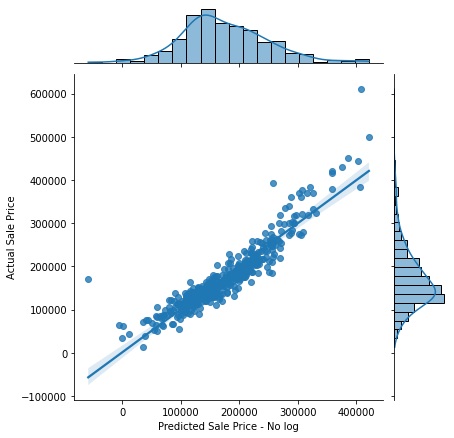

In [106]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax2 = sns.jointplot(
    x = lasso_best.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax2.ax_joint.set_xlabel('Predicted Sale Price - No log')
ax2.ax_joint.set_ylabel('Actual Sale Price')

<AxesSubplot:>

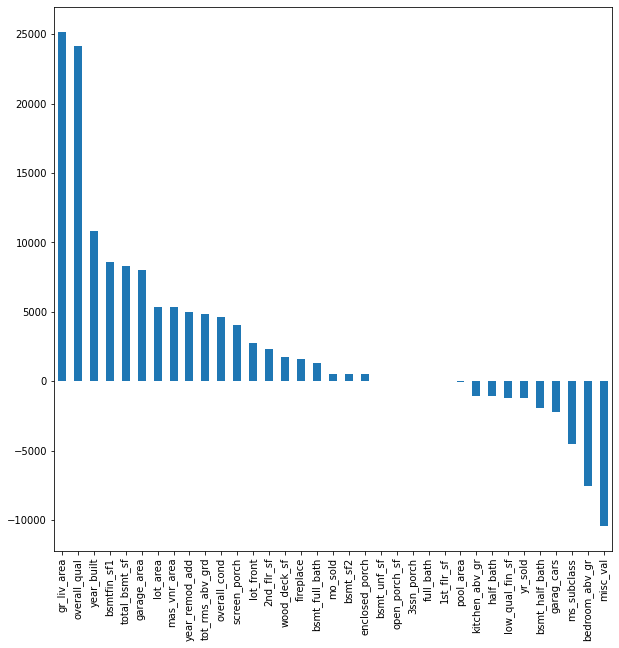

In [123]:
# hwo to plot the series 
plt.figure(figsize=(10,10))
pd.Series(lasso_best.coef_, index = df[variables_1].columns).sort_values(ascending = False).plot.bar()

In [107]:
data.columns.drop(['sale_price', 'above300K_1'])

NameError: name 'data' is not defined

In [108]:
# hwo to plot the series 
plt.figure(figsize=(10,10))
pd.Series(lasso_best.coef_, index = data.columns.drop(['sale_price', 'above300K_1'])).sort_values(ascending = False).plot.bar()

NameError: name 'data' is not defined

<Figure size 720x720 with 0 Axes>

In [111]:
grouped = df.groupby('neighborhood')['sale_price']

In [113]:
feature_set_model = SelectFromModel(lasso_best)
feature_set_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=63.9474820926819))

In [114]:
len(X_train)

1640

In [115]:
len(y_train)

1640

In [116]:
feature_set_model.get_support()

array([ True,  True,  True,  True, False,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [117]:
#refined model 
refined = X.columns[feature_set_model.get_support()]

In [118]:
X = model_feat[refined]
y = model_feat['sale_price']

# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state = 123
)

# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
# Z_train = sc.fit_transform(X_train)
sc.fit(X_train) # fit should only see train data, 
                #else if put in test, will have leak from the train data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

KeyError: "['half_bath', 'bsmt_full_bath', '2nd_flr_sf', 'screen_porch', 'bedroom_abv_gr', 'mo_sold', 'pool_area', 'bsmt_sf2', 'misc_val', 'yr_sold', 'low_qual_fin_sf', 'bsmt_half_bath', 'ms_subclass', 'kitchen_abv_gr', 'overall_cond', 'enclosed_porch'] not in index"

In [ ]:
# fit 

lasso.fit(X_train,y_train)

lasso.alpha_

In [ ]:
# create lasso best 2 

lasso_best_2 = Lasso(alpha=lasso.alpha_)

In [ ]:
lasso_best_2.fit(X_train,y_train)

In [ ]:
# cross val mse
cross_score = - cross_val_score(
    lasso_best_2,
    X_train,
    y_train,
    cv = 3,
    scoring = 'neg_mean_squared_error'
).mean()

# test mse
mse_test = mean_squared_error(
    y_test,
    lasso_best_2.predict(X_test)
)
# cross - test 
mse_train_minus_test = cross_score - mse_test

if mse_train_minus_test > 0:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Underfited by: {mse_train_minus_test}')
else:
    print(f'MSE for train: {cross_score}')
    print(f'MSE for test: {mse_test}')
    print(f'Overfitted by: {mse_train_minus_test}')
print(f'RMSE: {mse_test**0.5}')

In [ ]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax2 = sns.jointplot(
    x = lasso_best_2.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax2.ax_joint.set_xlabel('Predicted Sale Price - No log')
ax2.ax_joint.set_ylabel('Actual Sale Price')

In [ ]:
X.columns

In [ ]:
# noticed at higher ends of the sale_price,
# model is calculating below real sales_price

ax2 = sns.jointplot(
    x = lasso_best_2.predict(X_test),
    y = y_test,
    kind = 'reg'
)
ax2.ax_joint.set_xlabel('Predicted Sale Price - No log')
ax2.ax_joint.set_ylabel('Actual Sale Price')